# **알고리즘의 데이터 학습을 위한 전처리**

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/Tutorial-Python-Programming/blob/main/Practice1-8_Basic_DataFrameAdvance_KK.ipynb)

<center><img src='Image/Advanced/Bigdata_Algorithm.png' width='600'></center>

## 자연어 처리(Natural Language Processing)

**1) Text Analytics:** `컴퓨터와 인간언어의 상호작용` 분야에서 출발했으며, 기계가 `인간의 언어를 이해하고 해석`하기 위해 `텍스트에서`에서 `의미있는 정보를 추출`하는 기술

| **분석 기법** | **설명** |
|:---|:---|
| **텍스트 요약(Summarization)** | 텍스트 내 의미있는 `주요 주제나 중심 사상`을 추출하는 `토픽 모델링(Topic Modeling)`에 활용 |
| **텍스트 예측(Text Prediction)** | 기존의 문서나 말의 내용을 기반으로 `향후 등장할 단어나 문장을 예측` <br> `지도학습` 방식으로 주로 학습하여   `구글번역, 이메일 자동완성, 챗봇 등`에 활용 |
| **텍스트 분류(Text Classification)** | 문서가 `특정 분류 또는 카테고리`에 속하는 지 예측 <br> `지도 학습` 방식으로 주로 학습하여 `기사 카테고리 분류   및 스팸 메일 검출 등`에 활용 |
| **텍스트 군집화(Clustering)** | `비슷한 유형의 문서`를 모아 `유사도 기반 군집화`를 수행 <br> 빈번하게 출현하는 유의미한 `동시 출현 단어쌍`들을 네트워크 분석으로 관계 파악 |
| **감정 분석(Sentiment Analysis)** | `텍스트에서 나타나는 의견이나 감정`을 분석하는 기법 <br> `소셜 미디어 감정 분석, 영화나 제품의 리뷰 긍부정 분석, 사회 이슈파악, 여론분석이나 심리분석 등` <br> 텍스트 분석에서 가장 활발하게 활용 |

---

**2) 자연어 전처리(Natural Language Preprocessing):**

> **"`텍스트마이닝` 적용을 위해 `문제 용도와 알고리즘에 맞게 텍스트 코퍼스(Corpus)를 처리하는 것` (`비구조화 데이터` $\rightarrow$ `구조화 데이터`)"**
>
> - **Corpus:** 컴퓨터에 저장된 체계적인 `자연어 디지털 데이터 모음`으로 `언어의 구성`을 알아내는데 사용하며 `말뭉치`라고도 함

<center><img src='Image/Advanced/NLP_Process2.png' width='700'>(https://brunch.co.kr/@geumjaelee/4)</center>

---

<center><img src='Image/Advanced/NLP_Process.png' width='700'>(https://gritmind.blog/2021/03/27/search_nlp/)</center>

---

```python
# 설치
# NLTK(National Language Toolkit for Python)
# 파이썬의 가장 대표적인 NLP 패키지로 모든 영역을 커버
# 많은 NLP 패키지가 NLTK의 영향을 받음
# 속도에서 아쉬운 부분이 있어 빅데이터에서 제대로 활용되지 못함
!pip install nltk
import nltk
nltk.download()    # Just Once
```

In [1]:
!pip install nltk
import nltk
# nltk.download()    # Just Once
!pip install tensorflow
!pip install keras
!pip install wordcloud
!pip install gensim


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# **토큰화(Tokenization)**

> **"`코퍼스(Corpus)에서 토큰(Token)`이라 불리는 단위로 나누는 작업으로, 문서에서 문장을 분리하는 `문장 토큰화`와 문장에서 단어를 분리하는 `단어 토큰화`로 이루어짐"**
>
> **"텍스트 데이터는 `분석 목적과 용도`에 따라 `수동적 전처리가 필수`이지만, `다양한 의미로 표현 가능`하기 때문에 `최소화 필요`"**

## 문장 토큰화(Sentence Tokenization)

> **"코퍼스를 `문장단위로 구분`하는 작업으로, `문장 분류(Sentence Segmentation)`라고도 함"**
>
> - `마침표(.)나 특수기호`로 문장을 구분할 수 있겠지만, `일반화 하기 어려움` (ex. IP주소)
> - `나라와 문화`마다 문장 종료에 대해 `직접 규칙마련` 하는 것이 중요

```python
# 불러오기
from nltk.tokenize import sent_tokenize

# 한국어 문장토큰화 설치
# kss(Korean Sentence Splitter)는 정교한 패턴기반 뛰어난 성능과 속도
!pip install kss

# 한국어 문장토큰화 불러오기
from kss import split_sentences
```

In [2]:
# sent_tokenize 방법론 적용
from nltk.tokenize import sent_tokenize

sentence = 'A machine learning methodology is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'
sent_tokenize(sentence)

['A machine learning methodology is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics.',
 'The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions.',
 'Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.']

In [3]:
# sent_tokenize 방법론 적용
# 단순히 마침표로 문장을 종결시키지 않음
from nltk.tokenize import sent_tokenize

sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'
sent_tokenize(sentence)

['The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics.',
 'The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions.',
 'Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.']

In [4]:
# 한국어 문장토큰화 적용
from nltk.tokenize import sent_tokenize

sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."
sent_tokenize(sentence)

["디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다.",
 '디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다.']

In [5]:
# 한국어 문장토큰화 kss 설치
!pip install kss


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# 한국어 문장토큰화 kss 적용
from kss import split_sentences

sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."
split_sentences(sentence)

[Korean Sentence Splitter]: Initializing Pynori...


["디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다.",
 '디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다.']

## 단어 토큰화(Word Tokenization)

**1) 구두점(Punctuation Mark)이나 특수문자의 단순삭제 주의!**

- `마침표`는 의미는 없지만 `문장의 경계`를 파악하는데 도움
- `$`의 경우 `가격 데이터를 파악`하게 하고 `/`의 경우 `날짜 데이터 파악`에 도움
- `,(comma)`의 경우 문장의 구분 뿐만 아니라 `숫자 단위` 의미 가능

**2) 줄임말이나 띄어쓰기의 의미구분 주의!**

- `아포스트로피(')`는 단어를 줄이고 펼치는 역할 (we're $\rightarrow$ we are)
- `띄어쓰기`는 의미기준으로 `어디까지를 하나의 단어`로 판단할지 고민 필요 (New Yort $\rightarrow$ New + York)

```python
# 불러오기
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer
from keras.preprocessing.text import text_to_word_sequence
```

In [7]:
# Woword_tokenize 방법론 적용
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer

text = "How does market's informational efficiency reveal collective dynamics during COVID-19 pandemic? A clustering-based machine learning approach in financial markests!"
token_wt = word_tokenize(text)
token_wt

['How',
 'does',
 'market',
 "'s",
 'informational',
 'efficiency',
 'reveal',
 'collective',
 'dynamics',
 'during',
 'COVID-19',
 'pandemic',
 '?',
 'A',
 'clustering-based',
 'machine',
 'learning',
 'approach',
 'in',
 'financial',
 'markests',
 '!']

In [8]:
# WordPunctTokenizer 방법론 적용
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer

text = "How does market's informational efficiency reveal collective dynamics during COVID-19 pandemic? A clustering-based machine learning approach in financial markests!"
tokenizer = WordPunctTokenizer()
token_wp = tokenizer.tokenize(text)
token_wp

['How',
 'does',
 'market',
 "'",
 's',
 'informational',
 'efficiency',
 'reveal',
 'collective',
 'dynamics',
 'during',
 'COVID',
 '-',
 '19',
 'pandemic',
 '?',
 'A',
 'clustering',
 '-',
 'based',
 'machine',
 'learning',
 'approach',
 'in',
 'financial',
 'markests',
 '!']

In [9]:
# Penn Treeback Tokenization 방법론 적용
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer

text = "How does market's informational efficiency reveal collective dynamics during COVID-19 pandemic? A clustering-based machine learning approach in financial markests!"
tokenizer = TreebankWordTokenizer()
token_twt = tokenizer.tokenize(text)
token_twt

['How',
 'does',
 'market',
 "'s",
 'informational',
 'efficiency',
 'reveal',
 'collective',
 'dynamics',
 'during',
 'COVID-19',
 'pandemic',
 '?',
 'A',
 'clustering-based',
 'machine',
 'learning',
 'approach',
 'in',
 'financial',
 'markests',
 '!']

In [10]:
# Keras 텍스트처리 방법론 적용
from keras.preprocessing.text import text_to_word_sequence

text = "How does market's informational efficiency reveal collective dynamics during COVID-19 pandemic? A clustering-based machine learning approach in financial markests!"
token_tws = text_to_word_sequence(text)
token_tws

['how',
 'does',
 "market's",
 'informational',
 'efficiency',
 'reveal',
 'collective',
 'dynamics',
 'during',
 'covid',
 '19',
 'pandemic',
 'a',
 'clustering',
 'based',
 'machine',
 'learning',
 'approach',
 'in',
 'financial',
 'markests']

In [11]:
# 토큰화 결과비교
# WordPunctTokenizer는 특수문자를 별도로 분류하는 특징
# TreebankWordTokenizer는 대문자를 소문자로 바꾸면서 특수문자 삭제하고 아포스트로피는 보존
# text_to_word_sequence는 word_tokenize와 유사한 결과
import pandas as pd

token_results = pd.concat([pd.Series(token_wt), 
                           pd.Series(token_wp),
                           pd.Series(token_tws), 
                           pd.Series(token_twt)], axis=1)
token_results.columns = ['word_tokenize', 'WordPunctTokenizer', 
                         'TreebankWordTokenizer', 'text_to_word_sequence']
token_results.fillna('', inplace=True)
token_results

,word_tokenize,WordPunctTokenizer,TreebankWordTokenizer,text_to_word_sequence
0,How,How,how,How
1,does,does,does,does
2,market,market,market's,market
3,'s,',informational,'s
4,informational,s,efficiency,informational
5,efficiency,informational,reveal,efficiency
6,reveal,efficiency,collective,reveal
7,collective,reveal,dynamics,collective
8,dynamics,collective,during,dynamics
9,during,dynamics,covid,during


## 한국어 형태소 토큰화(Morpheme Tokenization)

**1) 교착어 특성:** `단어가 결합`되어 `의미가 변경`되는 특성

- 영어는 `독립적인 단어`를 띄어쓰기 단위로 구분하지만, 한국어는 `단어 + 조사 등`이 독립적인 단어의 역할을 하기에 `띄어쓰기만으로 토큰화 어려움`
- 같은 단어에도 `서로 다른 조사`가 붙어서 `다른 의미의 단어로 인식`되기 때문에 대부분의 한국어 자연어처리에서는 `조사 분리 필요`
- 뜻을 가진 가장 작은 말의 단위로 더 이상 쪼개면 뜻을 잃어버리는 `형태소(Morpheme)`를 기준으로 전처리 필요 $\rightarrow$ `Feature Engineering`

> **(1) 자립 형태소:** 접사, 어미, 조사와 상관없이 `단어 자체의 의미만으로 자립`될 수 있는 형태소로 `명사, 대명사, 수사, 부사, 감탄사 등`
>
> - **예시:** 경원이가 책을 읽었다 $\rightarrow$ `경원이`, `책`
>
> **(2) 의존 형태소:** 다른 형태소와 `결합되어야 의미가 확실한` 형태소로 `접사, 어미, 조사, 어간 등`
>
> - **예시:** 경원이가 책을 읽었다 $\rightarrow$ `-가`, `-을`, `읽-`, `-었`, `-다`

---

**2) 띄어쓰기가 없이 이해 가능**

- 한국어에 띄어쓰기가 보편화 된 것은 `1933년 한글맞춤법통일안`
- 단어로 구분하여 문장을 `풀어쓰는 영어`와 달리 단어를 `모아서 문장을 만드는 영어`의 특성 때문에, `띄어쓰기가 무시되는 경우`가 많아 전처리 어려움

> - **예시:** 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.
>
> - **예시:** Tobeornottobethatisthequestion

---

**3) 품사 태깅(Part of Speech Tagging, POS Tagging):** 분류된 형태소의 `품사 라벨`을 붙여 주로 `분석에 필요한 품사` 필터링에 사용

**(1) POS Tag:** 태깅시 사용하는 `약속된 품사`
> - 한국어와 영어는 `품사의 종류 차이` 존재

| **순서** | **품사명** | **한국어** | **영어** | **예시** |
|:---:|:---|:---:|:---:|:---|
| 1 | 명사(noun) | O | O | 가구, 가방, 가요, 가정 … |
| 2 | 대명사(pronoun) | O | O | 거기, 그곳, 너희, 누구, 당신, 무엇, 어느덧, 어디, 언제, 얼마, 이곳, 이분, … |
| 3 | 동사(verb) | O | O | 감동하다, 가사하다, 걸리다, 거어가다, … |
| 4 | 형용사(adjective) | O | O | 가깝다, 가난하다, 가늘하다, 가능하다, 가볍다, … |
| 5 | 관형사 |  |  | 각, 그, 그런, 내(나의), 네(너의), 만(나이), 첫, 한(500명), … |
| 6 | 수사 | O |  | 하나, 둘, 셋, 백, 수천, 아홉, 오홉째, 억, … |
| 7 | 부사(adverb) | O | O | 가까이, 가끔, 가득, 가만히, 각각, 각자, 간단히, 굉장히, 그리고, 금방, 다행히, 단순히, 대체로, 더욱, … |
| 8 | 조사 | O |  | 은, 는, 이, 가, … |
| 9 | 감탄사 | O |  | 그래, 그럼, 글쎄, 아, 아니, 아니요, 아이고, 안녕, 야, 어머, 여보, 여보세요, 예, 와, 응, 자, … |
| 10 | 관사(article) |  | O |  |
| 11 | 전치사(preposition) |  | O |  |
| 12 | 접속사(conjunction) |  | O |  |

**(2) Tag Set:** 약속된 품사들의 `태그 모음`

- **[한국어](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0):** 분석기 라이브러리에 따라 `Tagset` 분류 `차이 존재`

- **영어:** NLTK 라이브러리에서는 [`펜 트리뱅크 태그셋(Penn Treebank Tagset)`](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) 사용

| **순서** | **품사 태그** | **설명** | **예시** | **NLTK** |
|:---:|:---|:---|:---|:---:|
| 1 | CC | coordinating conjunction | and | O |
| 2 | CD | cardinal number | 1, third | O |
| 3 | DT | determiner | the | O |
| 4 | EX | existential there | there is | O |
| 5 | FW | foreign word | les | O |
| 6 | IN | preposition, subordinating conjunction | in, of, like | O |
| 7 | IN/that | that as subordinator | that | 　 |
| 8 | JJ | adjective | green | O |
| 9 | JJR | adjective, comparative | greener | O |
| 10 | JJS | adjective, superlative | greenest | O |
| 11 | LS | list marker | 1) | O |
| 12 | MD | modal | could, will | O |
| 13 | NN | noun, singular or mass | table | O |
| 14 | NNS | noun plural | tables | O |
| 15 | NP | proper noun, singular | John | O |
| 16 | NPS | proper noun, plural | Vikings | O |
| 17 | PDT | predeterminer | both the boys | O |
| 18 | POS | possessive ending | friend’s | O |
| 19 | PP | personal pronoun | I, he, it | O |
| 20 | PP`$` | possessive pronoun | my, his | O |
| 21 | RB | adverb | however, usually, naturally, here, good | O |
| 22 | RBR | adverb, comparative | better | O |
| 23 | RBS | adverb, superlative | best | O |
| 24 | RP | particle | give up | O |
| 25 | SENT | Sentence-break punctuation | . ! ? | 　 |
| 26 | SYM | Symbol | / [ = * | 　 |
| 27 | TO | infinitive ‘to’ | togo | O |
| 28 | UH | interjection | uhhuhhuhh | O |
| 29 | VB | verb be, base form | be | O |
| 30 | VBD | verb be, past tense | was, were | O |
| 31 | VBG | verb be, gerund/present participle | being | O |
| 32 | VBN | verb be, past participle | been | O |
| 33 | VBP | verb be, sing. present, non-3d | am, are | O |
| 34 | VBZ | verb be, 3rd person sing. present | is | O |
| 35 | VH | verb have, base form | have | 　 |
| 36 | VHD | verb have, past tense | had | 　 |
| 37 | VHG | verb have, gerund/present participle | having | 　 |
| 38 | VHN | verb have, past participle | had | 　 |
| 39 | VHP | verb have, sing. present, non-3d | have | 　 |
| 40 | VHZ | verb have, 3rd person sing. present | has | 　 |
| 41 | VV | verb, base form | take | 　 |
| 42 | VVD | verb, past tense | took | 　 |
| 43 | VVG | verb, gerund/present participle | taking | 　 |
| 44 | VVN | verb, past participle | taken | 　 |
| 45 | VVP | verb, sing. present, non-3d | take | 　 |
| 46 | VVZ | verb, 3rd person sing. present | takes | 　 |
| 47 | WDT | wh-determiner | which | O |
| 48 | WP | wh-pronoun | who, what | O |
| 49 | WP`$` | possessive wh-pronoun | whose | O |
| 50 | WRB | wh-abverb | where, when | O |
| 51 | # | # | # | 　 |
| 52 | $ | $ | $ | 　 |
| 53 | “ | Quotation marks | ‘ “ | 　 |
| 54 | ```` \| Opening quotation marks \| ‘ “ \| \| | 　 | 　 | 　 |
| 55 | ( | Opening brackets | ( { | 　 |
| 56 | ) | Closing brackets | ) } | 　 |
| 57 | , | Comma | , | 　 |
| 58 | : | Punctuation | – ; : — … | 　 |

In [12]:
# nltk 라이브러리에서 확인 가능
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

**4) 한국어 형태소 분석기 설치 및 로딩**

> **"`컴퓨터와 대부분의 알고리즘`은 `영미인이 개발`했기 때문에, 한국어에 `그대로 적용 어려움`"**

<center><img src='Image/Advanced/NLP_Korean_Difficult.png' width='500'></center>

- **KoNLPy:** `형태소 추출, 명사 추출, 품사 태깅` 기능 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 지원하며, 대한민국헌법 말뭉치 `kolaw`와 국회법안 말뭉치 `kobill` 제공

| **라이브러리명** | **설명** | **링크** |
|:---|:---|:---|
| Hannanum | 한나눔. KAIST   Semantic Web Research Center 개발 | http://semanticweb.kaist.ac.kr/hannanum/ |
| Kkma | 꼬꼬마. 서울대학교   IDS(Intelligent Data Systems) 연구실 개발 | http://kkma.snu.ac.kr/ |
| Komoran | 코모란.   Shineware에서 개발 | https://github.com/shin285/KOMORAN |
| Open   Korean Text | 오픈 소스 한국어 분석기.   과거 트위터 형태소 분석기 | https://github.com/open-korean-text/open-korean-text |
| Mecab | 메카브. 일본어용 형태소   분석기를 한국어를 사용할 수 있도록 수정 | https://bitbucket.org/eunjeon/mecab-ko |

- **장단점:** `한국어 형태소 분석기(POS) 분석: 형태소 분석기 비교 by metterian`

|  | **Hannanum** | **Kkma** | **Komoran** | **Open Korean Text** | **Mecab** |
|---|:---|:---|:---|:---|:---|
| **장점** | 로딩시간이 빠른편 | 띄어쓰기 오류에 덜 민감 | 자소 분리 가능, 오탈자 분석 가능,   고유명사 분석 가능 | 띄어쓰기 성능이 가장 좋다,   stemming 가능, 이모티콘, 해쉬태그 같은 인터넷 텍스트에 강함 , 비속어, 비표준어도 분석 가능 | 새로운 사전 추가 가능, (twitter   공개전) 띄어쓰기에서 가장 좋은 성능, 속도, 정확도 |
| **단점** | 띄어쓰기 없는 문장 분석에 매우 취약,   정제된 언어가 사용되지 않는 문서에 대한 형태소 분석 정확도가 높지 않은 문제점 | 분석 시간 오래 걸림, 정제된 언어가   사용되지 않는 문서에 대한 형태소 분석 정확도가 높지 않은 문제점 | 로딩 속도가 길다, 띄어쓰기 없는   문장분석에 취약하다 | 미등록어 처리 문제, 동음의어 처리문제,   분석 범주 적은편 | 미등록어 처리 문제, 동음의어 처리 문제 |

- 여러가지 중 그나마 `mecab`이 성능이 뛰어난 것으로 알려져있고, 카카오 `khaiii` 오픈 소스도 성능 좋은 것 중 하나
- 분석기 종류에 따라 `결과도 다르고 실행시간도 다르기`에 목적과 용도에 따라 `적절한 선택 필요`
---

```python
# 설치
# (1) JDK 설치: https://www.oracle.com/java/technologies/downloads/
# (2) JAVA 환경변수 설정 확인
import os
'JAVA_HOME' in os.environ
# (3) (2)에서 False가 나오면 JDK 설치경로를 직접 지정
# C:\Program Files\Java\jdk-18.0.2.1\bin\server
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-18.0.2.1\bin\server'
# (4) JAVA 환경변수 설정 True가 나오면 정상적 설치
'JAVA_HOME' in os.environ
# (5) Python 버전확인
import sys
sys.version
# (6) JPype 설치: 
# (6-1) 아래링크에서 Python 버전과 운영체제에 맞는 파일 다운로드
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
# (6-2) Anaconda Prompt에서 다운받은 파일 설치
# pip install JPype1‑1.4.0‑cp39‑cp39‑win_amd64.whl
# (7) Mecab 설치: 
# (7-1) C:\mecab 폴더 생성
# (7-2) 아래링크에서 윈도우 32bit/64bit 맞춰 다운로드 후 mecab폴더에 압출풀기
# https://github.com/Pusnow/mecab-ko-msvc/releases
# (7-3) 아래링크에서 최신파일을 다운로드 후 mecab폴더에 압출풀기
# https://github.com/Pusnow/mecab-ko-dic-msvc/releases
# (7-4) 아래링크에서 Python 버전과 운영체제에 맞는 파일 다운로드 후 site-package 폴더로 붙여넣기
!python -m site
# (7-5) Anaconda Prompt에서 다운받은 파일 설치
# pip install mecab_python-0.996_ko_0.9.2_msvc-cp38-cp38-win_amd64.whl
# https://github.com/Pusnow/mecab-python-msvc/releases
# KoNLPy 설치
!pip install konlpy

# 불러오기
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()
```

In [13]:
# KoNLPy 설치
import os
print('JAVA_HOME' in os.environ)
import sys
print(sys.version)
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-18.0.2.1\bin\server'
print('JAVA_HOME' in os.environ)
!python -m site
!pip install konlpy

False
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
True
sys.path = [
    'C:\\DataScience\\Lecture\\[DataScience]',
    'C:\\Users\\KK\\anaconda3\\python39.zip',
    'C:\\Users\\KK\\anaconda3\\DLLs',
    'C:\\Users\\KK\\anaconda3\\lib',
    'C:\\Users\\KK\\anaconda3',
    'C:\\Users\\KK\\AppData\\Roaming\\Python\\Python39\\site-packages',
    'C:\\Users\\KK\\anaconda3\\lib\\site-packages',
    'C:\\Users\\KK\\anaconda3\\lib\\site-packages\\win32',
    'C:\\Users\\KK\\anaconda3\\lib\\site-packages\\win32\\lib',
    'C:\\Users\\KK\\anaconda3\\lib\\site-packages\\Pythonwin',
]
USER_BASE: 'C:\\Users\\KK\\AppData\\Roaming\\Python' (exists)
USER_SITE: 'C:\\Users\\KK\\AppData\\Roaming\\Python\\Python39\\site-packages' (exists)
ENABLE_USER_SITE: True

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# 불러오기
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
# mecab = Mecab()

In [15]:
# 한국어 품사태깅 리스트
tagset_ko = pd.DataFrame()
for pkg in [hannanum, kkma, komoran, okt]:
    tagset_ko = pd.concat([tagset_ko,
                           pd.Series(pkg.tagset.keys()),
                           pd.Series(pkg.tagset.values())],
                          axis=1)
tagset_ko.columns = ['기호: hannanum', '품사: hannanum',
                     '기호: kkma', '품사: kkma',
                     '기호: komoran', '품사: komoran',
                     '기호: okt', '품사: okt']
tagset_ko.fillna('', inplace=True)
tagset_ko

,기호: hannanum,품사: hannanum,기호: kkma,품사: kkma,기호: komoran,품사: komoran,기호: okt,품사: okt
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,,,XPV,용언 접두사,,,,
63,,,XR,어근,,,,
64,,,XSA,형용사 파생 접미사,,,,
65,,,XSN,명사파생 접미사,,,,


- **KoNLPy:** `형태소 추출, 명사 추출, 품사 태깅` 기능 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 지원

In [16]:
# 영어 토큰화 및 품사 태깅
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'
token_wt = word_tokenize(sentence)
print('단어 토큰화: ', token_wt)
print()
print('품사 태깅: ', pos_tag(token_wt))

단어 토큰화:  ['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market', ',', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics', '.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time', ',', 'however', ',', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions', '.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency', ',', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well', '.']

품사 태깅:  [('The', 'DT'), ('Ph.D.', 'NNP'), ('AI', 'NNP'), ('is', 'VBZ'), ('used', 'VBN'), ('to', 'TO'), ('analyze', 'VB'), ('time-varying', 'JJ'), ('clusters', 'NNS'), ('of', 'IN'), ('efficiency', 'NN'), ('in', 'IN'), (

In [17]:
# 한국어 토큰화 및 품사 태깅
# nltk.tag.pos_tag는 한국어 품사 태깅 어려움
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."
token_wt = word_tokenize(sentence)
print('단어 토큰화: ', token_wt)
print()
print('품사 태깅: ', pos_tag(token_wt))

단어 토큰화:  ['디지털경제는', '재화와', '서비스의', '생산', ',', '분배', ',', '소비', '등', '주요', '경제활동이', "'디지털화되고", '네트워크화된', '정보와', "지식'이라는", '생산요소에', '주로', '의존하는', '경제를', '의미합니다', '.', '디지털화가', '급격하게', '확산되고', '있는', '것은', '정보와', '지식에', '대한', '욕구', '증대라는', '수요측면과', 'IT기술의', '비약적인', '발전이라는', '공급측면의', '요인이', '상호', '작용하고', '있기', '때문입니다', '.']

품사 태깅:  [('디지털경제는', 'JJ'), ('재화와', 'NNP'), ('서비스의', 'NNP'), ('생산', 'NNP'), (',', ','), ('분배', 'NNP'), (',', ','), ('소비', 'NNP'), ('등', 'NNP'), ('주요', 'NNP'), ('경제활동이', 'NNP'), ("'디지털화되고", 'POS'), ('네트워크화된', 'NNP'), ('정보와', 'NNP'), ("지식'이라는", 'NNP'), ('생산요소에', 'NNP'), ('주로', 'NNP'), ('의존하는', 'NNP'), ('경제를', 'NNP'), ('의미합니다', 'NNP'), ('.', '.'), ('디지털화가', 'VB'), ('급격하게', 'JJ'), ('확산되고', 'NNP'), ('있는', 'NNP'), ('것은', 'NNP'), ('정보와', 'NNP'), ('지식에', 'NNP'), ('대한', 'NNP'), ('욕구', 'NNP'), ('증대라는', 'NNP'), ('수요측면과', 'NNP'), ('IT기술의', 'NNP'), ('비약적인', 'NNP'), ('발전이라는', 'NNP'), ('공급측면의', 'NNP'), ('요인이', 'NNP'), ('상호', 'NNP'), ('작용하고', 'NNP'), ('있기', 'NNP'), ('때문입니다', 'NNP'), ('.

In [18]:
# KoNLPy 활용 한국어 토큰화 및 품사 태깅
sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."
print('형태소 토큰화: ', hannanum.morphs(sentence))
print()
print('명사 태깅: ', hannanum.nouns(sentence))
print()
print('품사 태깅: ', hannanum.pos(sentence))

형태소 토큰화:  ['디지털경제', '는', '재화', '와', '서비스', '의', '생산', ',', '분배', ',', '소비', '등', '주요', '경제활동', '이', "'", '디지털화', '되', '고', '네트워크화', '되', 'ㄴ', '정보', '와', '지식', "'", '이', '라는', '생산요소', '에', '주로', '의존', '하', '는', '경제', '를', '의미', '하', 'ㅂ니다', '.', '디지털화', '가', '급격', '하', '게', '확산', '되', '고', '있', '는', '것', '은', '정보', '와', '지식', '에', '대하', 'ㄴ', '욕구', '증대', '라는', '수요측면', '과', 'IT', '기술', '의', '비약적', '이', 'ㄴ', '발전', '이', '라는', '공급측면', '의', '요인', '이', '상호', '작용', '하고', '있', '기', '때문', '이', 'ㅂ니다', '.']

명사 태깅:  ['디지털경제', '재화', '서비스', '생산', '분배', '소비', '등', '주요', '경제활동', '디지털화', '네트워크화', '정보', '지식', '생산요소', '의존', '경제', '의미', '디지털화', '급격', '확산', '것', '정보', '지식', '욕구', '증대', '수요측면', '기술', '비약적', '발전', '공급측면', '요인', '작용', '때문']

품사 태깅:  [('디지털경제', 'N'), ('는', 'J'), ('재화', 'N'), ('와', 'J'), ('서비스', 'N'), ('의', 'J'), ('생산', 'N'), (',', 'S'), ('분배', 'N'), (',', 'S'), ('소비', 'N'), ('등', 'N'), ('주요', 'N'), ('경제활동', 'N'), ('이', 'J'), ("'", 'S'), ('디지털화', 'N'), ('되', 'X'), ('고', 'E'), ('네트워크화', 'N'), ('되'

In [19]:
# 라이브러리 별 한국어 형태소 토큰화 비교
import time

sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."

morpheme_ko = pd.DataFrame()
morpheme_time = []
for pkg in [hannanum, kkma, komoran, okt]:
    start = time.time()
    result = pd.Series(pkg.morphs(sentence))
    end = time.time()
    morpheme_ko = pd.concat([morpheme_ko, result], axis=1)
    morpheme_time.append(end-start)
morpheme_time = pd.DataFrame(morpheme_time).T
morpheme_time.index = ['Execution Time']
morpheme_time.columns = ['hannanum', 'kkma', 'komoran', 'okt']
morpheme_ko.columns = ['hannanum', 'kkma', 'komoran', 'okt']
morpheme_ko = pd.concat([morpheme_ko, morpheme_time], axis=0)    
morpheme_ko.fillna('', inplace=True)
morpheme_ko

,hannanum,kkma,komoran,okt
0,디지털경제,디지털,디지털,디지털
1,는,경제,경제,경제
2,재화,는,는,는
3,와,재화,재화,재화
4,서비스,와,와,와
...,...,...,...,...
89,,때문,때문,
90,,이,이,
91,,ㅂ니다,ㅂ니다,
92,,.,.,


# **정제 및 정규화(Cleaning & Normalization)**

> **"`토큰화 전/후`에, 텍스트 데이터를 용도에 맞게 `노이즈를 제거`하고 `의미 말뭉치로 정리`하기 위해 지속적으로 이루어지며 `완벽한 정답이 없어서 합의점 필요`"**
>
> - **정제(Cleaning):** `코퍼스로부터 노이즈를 제거`하는 것을 의미하며, `토큰화 전후` 반복적으로 적용
> - **정규화(Normalization):** `목적에 맞는 의미해석`에 따라 `단어를 통일 및 통합`하여 같은 단어로 적용
> - `토큰화 전`에 정제 또는 정규화를 진행하면 `토큰화에 도움` 될 수 있고, `토큰화 후`에도 여전히 남아있는 `노이즈 제거`하기 위해 지속적 수행
> - `최종 목표`는 보유하고 있는 코퍼스로부터 `복잡성을 줄이고 결과표현 효율을 높이는 것`

| **정제** | **정규화** |
|:---|:---|
| - 빈도가 적은   단어 제거 <br> - 불필요한 불용어 제거 <br> - 길이가 짧은 단어 제거 | - 대문자와 소문자 통합 <br> - 표제어 및 어간 추출 |

---

**1) 불필요한 단어 제거?**

- `특수문자 또는 수식단어 등`은 분석 목적에 맞지 않는 불필요 단어들을 `Noise Data`
- `발생 빈도가 낮은 단어나 불용어`도 자연어 처리에서는 도움이 되지 않을 수 있음
- **불용어:** `자주 등장하지만 분석목적에 큰 도움이 되지 않은 단어들`을 의미하며, 일반적으로 분석 목적에 따라 결국 `사용자/분석가가 직접 불용어 사전 구성`하는 경우가 많음

**2) 길이가 짧은단어 제거?**

- `영어`는 일반적으로 길이가 짧으면 `의미를 갖지 못하는 편`이라서 효과가 있을 수 있지만(a, it, the, by 등), `한국어`는 길이와 무관하나 `한자어도 많고 길이가 1인 단어들도 의미 내포하는 경우가 많은 편`
- `분석 목적`과 `언어의 문화`에 따라 `길이 기준`이 필요하며, 일반적으로는 `1~2`길이의 단어는 `제거하는 편`이 좋음

**3) 대문자와 소문자 통합?**

- 필요성은 있으나 `무조건 통합해서는 안됨` (`US` != `us`)
- `사람이름 또는 회사이름 등`은 단어 자체의미와는 다름
- 예외 사항을 크게 고려하지 않고, `모든 corpus를 소문자로 바꾸는 것`이 해결책이 되기도

> - **방법1:** 규칙을 정해 `문장의 맨 앞에 나오는 단어`만 소문자로 바꾸고, 나머지는 바꾸지 않음
> - **방법2:** 더 많은 변수를 사용해 `소문자 변환을 위한 머신러닝 시퀀스 모델`을 사용

**4) 같은 의미지만 표기가 다양한 단어들의 통합**

- `United States = USA = US`는 모두 같은 의미지만 다양하게 표기하기에, 전처리로 의미가 달라지기 전에 `미리 통합 기준 필요`
- `어간 추출(Stemming)`과 `표제어 추출(Lemmatization)`으로도 가능

In [20]:
# soynlp 설치
# 불러오기
!pip install soynlp

from soynlp.normalizer import *


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# 정규화를 위한 예제 데이터 생성
sentence = '훈화훈화훈화 말씀이말씀이말씀이 있겠다333!!! ABCDEFG 하하하하 ㅋㅋㅋㅋ'

In [22]:
# 감정표현 정규화처리
emoticon_normalize(sentence, num_repeats=1)

'훈화훈화훈화 말씀이말씀이말씀이 있겠다333!!! ABCDEFG 하 ㅋ'

In [23]:
# 특수문자 및 영어 제거 정규화
only_hangle(sentence)

'훈화훈화훈화 말씀이말씀이말씀이 있겠다 하하하하 ㅋㅋㅋㅋ'

In [24]:
# 특수문자 및 영어 제거 정규화
only_hangle_number(sentence)

'훈화훈화훈화 말씀이말씀이말씀이 있겠다333 하하하하 ㅋㅋㅋㅋ'

In [25]:
# 표현되지 않은 특수문자 제거 정규화
only_text(sentence)

'훈화훈화훈화 말씀이말씀이말씀이 있겠다333!!! ABCDEFG 하하하하 ㅋㅋㅋㅋ'

## 표제어추출(Lemmatization) & 어간추출(Stemming)

> **"눈으로 봤을 때는 서로 다른 단어들이지만, `하나의 단어로 일반화`시킬 수 있다면 하나의 단어로 일반화시켜서 `문서 내 단어 수를 줄이는 방법`"**
>
> - `단어 빈도수를 기반`으로 문제를 풀고자 하는 `BoW(Bag of Words) 표현`을 사용하는 자연어 처리 문제에서 주로 사용
> - 결국 자연어 처리에서 `전처리 또는 정규화`의 지향점은 `코퍼스로부터 복잡성을 줄이는 것`

---

**1) 표제어추출(Lemmatization):** 단어들로부터 `표제어` 또는 `기본 사전형 단어`를 찾아가는 과정

- 여러가지의 형태라 하더라도 `뿌리 단어(표제어)`를 찾아서 `단어의 갯수 감소 가능성 판단`(`am, are, is` $\rightarrow$ `be`)
- 의미를 가진 가장 작은 단위인 `형태소로부터` 핵심적 의미인 `어간`과 추가적 의미인 `접사`로 분리하는 작업(`cats` $\rightarrow$ `cat + s`)
> - **어간(Stem):** 단어의 의미를 담고 있는 단어의 `핵심 부분`
> - **접사(Affix):** 단어에 `추가적인 의미`를 주는 부분

```python
# 불러오기
from nltk.stem import WordNetLemmatizer
```

In [26]:
# 표제어 추출 방법
from nltk.stem import WordNetLemmatizer

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
lemmatizer = WordNetLemmatizer()

print('표제어 추출 전: \n', words)
print()
print('표제어 추출 후: \n', [lemmatizer.lemmatize(word) for word in words])

표제어 추출 전: 
 ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

표제어 추출 후: 
 ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


- 단어의 `형태는 적절히 보존`되는 양상
- `dy, ha`와 같이 의미를 알 수 없는 `적절하지 못한 단어 출력` 존재
- `단어의 품사정보`를 반영해야 하는 필요성

In [27]:
# 품사 정보를 반영하여 표제어 추출
# 출력도 품사 정보를 반영
lemma_result = []
for word in words:
    if word in ['dies', 'watched', 'has']:
        lemma = lemmatizer.lemmatize(word, 'v')
    else:
        lemma = lemmatizer.lemmatize(word)
    lemma_result.append(lemma)
    
print('표제어 추출 후: \n', lemma_result)

표제어 추출 후: 
 ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'die', 'watch', 'have', 'starting']


**2) 어간 추출(Stemming):** `특정 규칙(알고리즘)`으로 `어미를 잘라내어 핵심(Stem) 추출`

- 섬세한 작업이 아닌 `어림짐작 작업`이기 때문에 `결과 단어는 사전에 존재하지 않을 수` 있음

```python
# 불러오기
from nltk.stem import PorterStemmer, LancasterStemmer
```

In [28]:
# 포터 알고리즘(Porter Algorithm) 활용 어간 추출
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer

words = ['formalize', 'allowance', 'electricical']
stemmer = PorterStemmer()

print('어간 추출 전 :',words)
print()
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']

어간 추출 후 : ['formal', 'allow', 'electric']


In [29]:
# 포터 알고리즘(Porter Algorithm) 활용 어간 추출
# 표제어 추출보다 일반적으로 속도가 빠르고 영어에선 준수한 편
sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

token_wt = word_tokenize(sentence)
stemmer = PorterStemmer()

print('어간 추출 전: \n', token_wt)
print()
print('어간 추출 후: \n', [stemmer.stem(word) for word in token_wt])

어간 추출 전: 
 ['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market', ',', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics', '.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time', ',', 'however', ',', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions', '.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency', ',', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well', '.']

어간 추출 후: 
 ['the', 'ph.d.', 'ai', 'is', 'use', 'to', 'analyz', 'time-vari', 'cluster', 'of', 'effici', 'in', 'the', 'global', 'financi', 'market', ',', 'and', 'a', 'complex', 'network', 'structur', 'is', 'appli', 'to

In [30]:
# 랭커스터 스태머(Lancaster Stemmer) 알고리즘 활용 어간 추출 비교
# 알고리즘에 따라 일반화가 잘 안되거나 지나치게 일반화 가능
# 해당 코퍼스에 맞는 알고리즘 선택 필요
sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

token_wt = word_tokenize(sentence)
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()

print('어간 추출 전: \n', token_wt)
print()
print('포터 스테머의 어간 추출 후: \n', [stemmer_porter.stem(word) for word in token_wt])
print()
print('랭커스터 스테머의 어간 추출 후: \n', [stemmer_lancaster.stem(word) for word in token_wt])

어간 추출 전: 
 ['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market', ',', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics', '.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time', ',', 'however', ',', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions', '.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency', ',', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well', '.']

포터 스테머의 어간 추출 후: 
 ['the', 'ph.d.', 'ai', 'is', 'use', 'to', 'analyz', 'time-vari', 'cluster', 'of', 'effici', 'in', 'the', 'global', 'financi', 'market', ',', 'and', 'a', 'complex', 'network', 'structur', 'is', 'app

In [31]:
# 표제어 추출과 어간 추출 비교
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer

words = ['am', 'the going', 'having']
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])
print()
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

표제어 추출 후 : ['am', 'the going', 'having']

어간 추출 후 : ['am', 'the go', 'have']


## 한국어의 어간 추출 및 활용(Conjugation)

**1) 어간 추출(Stemming):**

> **"한국어에서는 `동사와 형용사`가 형태가 변하기 때문에 `용언`이라고 부르며, 어간(Stem)과 어미(Ending)의 결합으로 구성되기에 `어간 추출` 필요"**
>
> - **용언:** 명사, 수사, 감탄사 등과 달리 `문법적 기능을 하면서 단어가 아닌 형태소`를 말하며, 어간과 어미는 `그 자체가 단어이지 않고 결합되어서만 이용가능`
> - **어간(Stem):** 일반적으로 `모양이 변하지 않는 부분`으로 `어미 앞`에 위치하여 `중심의미 내포`(예: 긋다, 긋고, 그어서, 그어라)
> - **어미(Ending):** `어간 뒤`에 붙어 `변하는 부분`으로 여러 `문법적 기능`을 수행 목적

In [32]:
# 불러오기
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
# mecab = Mecab()

In [33]:
# 한국어 어간과 어미 분리
for pkg in [hannanum, kkma, komoran, okt]:
    print(pkg.pos('했다'))

[('하', 'P'), ('었다', 'E')]
[('하', 'VV'), ('었', 'EPT'), ('다', 'EFN')]
[('하', 'VV'), ('았', 'EP'), ('다', 'EC')]
[('했다', 'Verb')]


In [34]:
# 한국어 어간과 어미 분리 후 최종 어간 선택
for pkg in [hannanum, kkma, komoran, okt]:
    if pkg.pos('했다')[0][1] == 'P' or pkg.pos('했다')[0][1] == 'VV':
        print(pkg.pos('했다')[0][0] + '다')
    else:
        print(pkg.pos('했다')[0][0])

하다
하다
하다
했다


**2) 활용(Conjugation):** 

> **"`어간추출과 반대`로 어간과 어미가 결합하여 `용언을 생성하는 것을 활용(Conjugation)`이라고 하며, 어간과 어미의 `형태가 유지되는 경우`도 있고 어간 또는 어미의 `형태가 변하는 경우`의 방법론이 다름"**
>
> - `언어학 또는 문화적 이해`가 필요한 전처리라 `일반화가 어렵고 복잡한 편`

|  | **규칙활용** | **불규칙활용** |
|---|:---|:---|
| **정의** | 어간과 어미가 결합될 때, `어간 모습이 일정한` 경우 | 어간과 어미가 결합될 때, `어간 모습이 변하거나 어미가 특수한 경우` |
| **추출 방법** | `규칙 기반`으로 어미를 단순 분리 | 어간이 바뀌므로 단순 분리만 어렵고 좀 더 `복잡한 규칙이 필요` |
| **예시** | - 잡다 $\rightarrow$ 잡+아, 잡+고 <br> - 믿다 $\rightarrow$ 믿+음 <br> - 굳다 $\rightarrow$ 굳+을 | - 깨닫다 $\rightarrow$ 깨달아 <br> - 긋다 $\rightarrow$ 긋고, 그어서,그어라 <br> - 그러다 $\rightarrow$ 그러+어 $\rightarrow$ 그래 |

In [35]:
# soynlp 설치
# 불러오기
# 언어학 및 문화적 이해 기반 규칙과 단어 사전 구성
!pip install soynlp

from soynlp.hangle import compose, decompose

def conjugate(stem, ending):

    assert ending # ending must be inserted

    l_len = len(stem)
    l_last = decompose(stem[-1])
    l_last_ = stem[-1]
    r_first = decompose(ending[0])
    r_first_ = compose(r_first[0], r_first[1], ' ') if r_first[1] != ' ' else ending[0]

    candidates = set()
    
    # ㄷ 불규칙 활용: 깨달 + 아 -> 깨달아
    if l_last[2] == 'ㄷ' and r_first[0] == 'ㅇ':
        l = stem[:-1] + compose(l_last[0], l_last[1], 'ㄹ')
        candidates.add(l + ending)

    # 르 불규칙 활용: 구르 + 어 -> 굴러
    if (l_last_ == '르') and (r_first_ == '아' or r_first_ == '어') and l_len >= 2:
        c0, c1, c2 = decompose(stem[-2])
        l = stem[:-2] + compose(c0, c1, 'ㄹ')
        r = compose('ㄹ', r_first[1], r_first[2]) + ending[1:]
        candidates.add(l + r)

    # ㅂ 불규칙 활용:
    # (모음조화) 더럽 + 어 -> 더러워 / 곱 + 아 -> 고와 
    # (모음조화가 깨진 경우) 아름답 + 아 -> 아름다워 / (-답, -꼽, -깝, -롭)
    if (l_last[2] == 'ㅂ') and (r_first_ == '어' or r_first_ == '아'):
        l = stem[:-1] + compose(l_last[0], l_last[1], ' ')
        if l_len >= 2 and (l_last_ == '답' or l_last_ == '곱' or l_last_ == '깝' or l_last_ == '롭'):
            c1 = 'ㅝ'
        elif r_first[1] == 'ㅗ':
            c1 = 'ㅘ'
        elif r_first[1] == 'ㅜ':
            c1 = 'ㅝ'
        elif r_first_ == '어':
            c1 = 'ㅝ'
        else: # r_first_ == '아'
            c1 = 'ㅘ'
        r = compose('ㅇ', c1, r_first[2]) + ending[1:]
        candidates.add(l + r)

    # 어미의 첫글자가 종성일 경우 (-ㄴ, -ㄹ, -ㅂ, -ㅆ)
    # 이 + ㅂ니다 -> 입니다
    if l_last[2] == ' ' and r_first[1] == ' ' and (r_first[0] == 'ㄴ' or r_first[0] == 'ㄹ' or r_first[0] == 'ㅂ' or r_first[0] == 'ㅆ'):
        l = stem[:-1] + compose(l_last[0], l_last[1], r_first[0])
        r = ending[1:]
        candidates.add(l + r)

    # ㅅ 불규칙 활용: 붓 + 어 -> 부어
    # exception : 벗 + 어 -> 벗어    
    if (l_last[2] == 'ㅅ') and (r_first[0] == 'ㅇ'):
        if stem[-1] == '벗':
            l = stem
        else:
            l = stem[:-1] + compose(l_last[0], l_last[1], ' ')
        candidates.add(l + ending)

    # 우 불규칙 활용: 푸 + 어 -> 퍼 / 주 + 어 -> 줘
    if l_last[1] == 'ㅜ' and l_last[2] == ' ' and r_first[0] == 'ㅇ' and r_first[1] == 'ㅓ':
        if l_last_ == '푸':
            l = '퍼'
        else:
            l = stem[:-1] + compose(l_last[0], 'ㅝ', r_first[2])
        r = ending[1:]
        candidates.add(l + r)

    # 오 활용: 오 + 았어 -> 왔어
    if l_last[1] == 'ㅗ' and l_last[2] == ' ' and r_first[0] == 'ㅇ' and r_first[1] == 'ㅏ':
        l = stem[:-1] + compose(l_last[0], 'ㅘ', r_first[2])
        r = ending[1:]
        candidates.add(l + r)

    # ㅡ 탈락 불규칙 활용: 끄 + 어 -> 꺼 / 트 + 었다 -> 텄다
    if (l_last_ == '끄' or l_last_ == '크' or l_last_ == '트') and (r_first[0] == 'ㅇ') and (r_first[1] == 'ㅓ'):
        l = stem[:-1] + compose(l_last[0], r_first[1], r_first[2])
        r = ending[1:]
        candidates.add(l + r)

    # 거라, 너라 불규칙 활용
    # '-거라/-너라'를 어미로 취급하면 규칙 활용
    if ending[:2] == '어라' or ending[:2] == '아라':
        if l_last[1] == 'ㅏ':            
            r = '거' + ending[1:]
        elif l_last[1] == 'ㅗ':
            r = '너' + ending[1:]
        else:
            r = ending
        candidates.add(stem + r)

    # 러 불규칙 활용: 이르 + 어 -> 이르러 / 이르 + 었다 -> 이르렀다
    if l_last_ == '르' and r_first[0] == 'ㅇ' and r_first[1] == 'ㅓ':
        r = compose('ㄹ', r_first[1], r_first[2]) + ending[1:]
        candidates.add(stem + r)

    # 여 불규칙 활용
    # 하 + 았다 -> 하였다 / 하 + 었다 -> 하였다
    if l_last_ == '하' and r_first[0] == 'ㅇ' and (r_first[1] == 'ㅏ' or r_first[1] == 'ㅓ'):
        r = compose(r_first[0], 'ㅕ', r_first[2]) + ending[1:]
        candidates.add(stem + r)

    # ㅎ (탈락) 불규칙 활용
    # 파라 + 면 -> 파랗다 / 동그랗 + ㄴ -> 동그란
    if l_last[2] == 'ㅎ' and l_last_ != '좋' and not (r_first[1] == 'ㅏ' or r_first[1] == 'ㅓ'):
        if r_first[1] == ' ':
            l = l = stem[:-1] + compose(l_last[0], l_last[1], r_first[0])
        else:
            l = stem[:-1] + compose(l_last[0], l_last[1], ' ')
        if r_first_ == '으':
            r = ending[1:]
        elif r_first[1] == ' ':            
            r = ''
        else:
            r = ending
        candidates.add(l + r)

    # ㅎ (축약) 불규칙 할용
    # 파랗 + 았다 -> 파랬다 / 시퍼렇 + 었다 -> 시퍼렜다
    if l_last[2] == 'ㅎ' and l_last_ != '좋' and (r_first[1] == 'ㅏ' or r_first[1] == 'ㅓ'):
        l = stem[:-1] + compose(l_last[0], 'ㅐ' if r_first[1] == 'ㅏ' else 'ㅔ', r_first[2])
        r = ending[1:]
        candidates.add(l + r)

    # ㅎ + 네 불규칙 활용
    # ㅎ 탈락과 ㅎ 유지 모두 맞음
    if l_last[2] == 'ㅎ' and r_first[0] == 'ㄴ' and r_first[1] != ' ':
        candidates.add(stem + ending)

    if not candidates and r_first[1] != ' ':
        candidates.add(stem + ending)

    return candidates


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# 여러가지의 어간+어미 결합 형태의 일반화
testset = [
    ('깨닫', '아'), # ㄷ 불규칙
    ('구르', '어'), ('구르', '었다'), # 르 불규칙
    ('덥', '어'), ('줍', '어'), ('곱', '아'), ('곱', '어'), ('곱', '아서'),  # ㅂ 불규칙 모음조화
    ('아름답', '았다'), ('아니꼽', '어서'), ('아깝', '아서'), ('아깝', '어서'), ('감미롭', '아서'), # ㅂ 불규칙 모음조화가 깨진 경우
    ('이', 'ㅂ니다'), ('이', 'ㄹ지라도'), ('이', 'ㄴ'), ('이', 'ㅆ다'), # 어미의 첫글자가 초성일 경우
    ('벗', '어서'), ('긋', '어서'), ('긋', '었어'), ('낫', '아야지'), # ㅅ 불규칙
    ('푸', '어'), ('주', '어'), ('주', '었다'), # 우 불규칙
    ('오', '았어'), ('사오', '았다'), ('돌아오', '았지용'), # 오 규칙 활용
    ('끄', '었다'), ('끄', '어'), ('트', '었던건데'), ('들', '었다'),  # ㅡ 탈락 불규칙
    ('가', '아라'), ('삼가', '어라'), ('삼가', '아라니까'), ('돌아오', '아라'), # 거라/너라 불규칙
    ('이르', '어'), ('푸르', '어'), ('이르', '었다던'), # 러 불규칙
    ('아니하', '았다'), ('영원하', '었던'), # 여 불규칙
    ('파랗', '으면'), ('파랗', '면'), ('동그랗', 'ㄴ'), # ㅎ (탈락) 불규칙 
    ('파랗', '았다'), ('시퍼렇', '었다'), # ㅎ (축약) 불규칙
    ('그렇', '네'), ('파랗', '네요'), # ㅎ + 네 불규칙
    ('좋', '아'), ('좋', '았어'), # ㅎ 불규칙 예외
    ('하', '았다'), ('하', '었다') # 여 불규칙 (2)
]

for stem, eomi in testset:
    print('{} + {} -> {}'.format(stem, eomi, conjugate(stem, eomi)))

깨닫 + 아 -> {'깨달아'}
구르 + 어 -> {'굴러', '구르러'}
구르 + 었다 -> {'구르렀다', '굴렀다'}
덥 + 어 -> {'더워'}
줍 + 어 -> {'주워'}
곱 + 아 -> {'고와'}
곱 + 어 -> {'고워'}
곱 + 아서 -> {'고와서'}
아름답 + 았다 -> {'아름다웠다'}
아니꼽 + 어서 -> {'아니꼬워서'}
아깝 + 아서 -> {'아까워서'}
아깝 + 어서 -> {'아까워서'}
감미롭 + 아서 -> {'감미로워서'}
이 + ㅂ니다 -> {'입니다'}
이 + ㄹ지라도 -> {'일지라도'}
이 + ㄴ -> {'인'}
이 + ㅆ다 -> {'있다'}
벗 + 어서 -> {'벗어서'}
긋 + 어서 -> {'그어서'}
긋 + 었어 -> {'그었어'}
낫 + 아야지 -> {'나아야지'}
푸 + 어 -> {'퍼'}
주 + 어 -> {'줘'}
주 + 었다 -> {'줬다'}
오 + 았어 -> {'왔어'}
사오 + 았다 -> {'사왔다'}
돌아오 + 았지용 -> {'돌아왔지용'}
끄 + 었다 -> {'껐다'}
끄 + 어 -> {'꺼'}
트 + 었던건데 -> {'텄던건데'}
들 + 었다 -> {'들었다'}
가 + 아라 -> {'가거라'}
삼가 + 어라 -> {'삼가거라'}
삼가 + 아라니까 -> {'삼가거라니까'}
돌아오 + 아라 -> {'돌아오너라', '돌아와라'}
이르 + 어 -> {'일러', '이르러'}
푸르 + 어 -> {'풀러', '푸르러'}
이르 + 었다던 -> {'일렀다던', '이르렀다던'}
아니하 + 았다 -> {'아니하였다'}
영원하 + 었던 -> {'영원하였던'}
파랗 + 으면 -> {'파라면'}
파랗 + 면 -> {'파라면'}
동그랗 + ㄴ -> {'동그란'}
파랗 + 았다 -> {'파랬다'}
시퍼렇 + 었다 -> {'시퍼렜다'}
그렇 + 네 -> {'그러네', '그렇네'}
파랗 + 네요 -> {'파랗네요', '파라네요'}
좋 + 아 -> {'좋아'}
좋 + 았어 -> {'좋았어'}
하 + 았다 -> {'하였다'}
하 + 었

## 불용어(Stop Word) 처리

> **"데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 `큰 의미가 없는 단어 토큰을 제거`하는 작업이 필요"**
>
> - **불용어(Stop Word):** `I, my, is, the, a, will, me, over, 조사, 접미사 등` 의 문장 구성 `필수 문법`이지만 분석에 있어 도움/기여하는 바가 없는 `문맥적 큰 의미가 없는` 단어
> - 불용어를 제거하지 않으면 그 빈번함으로 인해 `중요한 단어로 인지` 될 수 있고 `연산속도와 성능이 떨어질` 수 있음
> - 분석 목적이나 환경 또는 `언어적 문화` 때문에 `분석가가 직접 지정`도 필요
> - 언어 별 `스톱 워드가 목록화` 존재하며, `NLTK`에서는 100여개 이상의 `영어 단어 불용어`로 패키지 내 미리 `저장`

In [37]:
# 영어 불용어 리스트 확인
from nltk.corpus import stopwords

print('영어 stop word 개수: ', len(stopwords.words('english')))
print(stopwords.words('english'))

영어 stop word 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [38]:
# 불어 불용어 리스트 확인
print('불어 stop word 개수: ', len(stopwords.words('french')))
print(stopwords.words('french'))

불어 stop word 개수:  157
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 

In [39]:
# 불용어 제거 예시
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "Family is not an important thing. It's everything."

stop_words = stopwords.words('english')
token_wt = word_tokenize(sentence)
print('불용어 제거 전: ', token_wt)
print()
print('불용어 제거 후: ', [word for word in token_wt if word not in stop_words])

불용어 제거 전:  ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']

불용어 제거 후:  ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [40]:
# 불용어 제거 예시
sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

stop_words = stopwords.words('english')
token_wt = word_tokenize(sentence)
print('불용어 제거 전: ', token_wt)
print()
print('불용어 제거 후: ', [word for word in token_wt if word not in stop_words])

불용어 제거 전:  ['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market', ',', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics', '.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time', ',', 'however', ',', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions', '.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency', ',', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well', '.']

불용어 제거 후:  ['The', 'Ph.D.', 'AI', 'used', 'analyze', 'time-varying', 'clusters', 'efficiency', 'global', 'financial', 'market', ',', 'complex', 'network', 'structure', 'applied', 'evaluate', 'collective', 'dynamics',

- **한국어 stop word 종류:** https://www.ranks.nl/stopwords/korean

> - 일반적으로 토큰화 후에 `조사, 접속사 등`을 제거
> - `명사 형용사` 중 제거하고 싶은 것들이 생기면 `별도 불용어 리스트 제작`

In [41]:
# 한국어 불용어 리스트
stop_words_ko = ['아',	'휴',	'아이구',	'아이쿠',	'아이고',	'어',	'나',	'우리',	'저희',	'따라',	'의해',
                 '을',	'를',	'에',	'의',	'가',	'으로',	'로',	'에게',	'뿐이다',	'의거하여',	'근거하여',
                 '입각하여',	'기준으로',	'예하면',	'예를 들면',	'예를 들자면',	'저',	'소인',	'소생',	'저희',
                 '지말고',	'하지마',	'하지마라',	'다른',	'물론',	'또한',	'그리고',	'비길수 없다',	'해서는 안된다',
                 '뿐만 아니라',	'만이 아니다',	'만은 아니다',	'막론하고',	'관계없이',	'그치지 않다',	'그러나',	'그런데',
                 '하지만',	'든간에',	'논하지 않다',	'따지지 않다',	'설사',	'비록',	'더라도',	'아니면',	'만 못하다',
                 '하는 편이 낫다',	'불문하고',	'향하여',	'향해서',	'향하다',	'쪽으로',	'틈타',	'이용하여',	'타다',
                 '오르다',	'제외하고',	'이 외에',	'이 밖에',	'하여야',	'비로소',	'한다면 몰라도',	'외에도',	'이곳',	'여기',
                 '부터',	'기점으로',	'따라서',	'할 생각이다',	'하려고하다',	'이리하여',	'그리하여',	'그렇게 함으로써',
                 '하지만',	'일때',	'할때',	'앞에서',	'중에서',	'보는데서',	'으로써',	'로써',	'까지',	'해야한다',
                 '일것이다',	'반드시',	'할줄알다',	'할수있다',	'할수있어',	'임에 틀림없다',	'한다면',	'등',	'등등',
                 '제',	'겨우',	'단지',	'다만',	'할뿐',	'딩동',	'댕그',	'대해서',	'대하여',	'대하면',	'훨씬',
                 '얼마나',	'얼마만큼',	'얼마큼',	'남짓',	'여',	'얼마간',	'약간',	'다소',	'좀',	'조금',	'다수',
                 '몇',	'얼마',	'지만',	'하물며',	'또한',	'그러나',	'그렇지만',	'하지만',	'이외에도',	'대해 말하자면',
                 '뿐이다',	'다음에',	'반대로',	'반대로 말하자면',	'이와 반대로',	'바꾸어서 말하면',	'바꾸어서 한다면',	'만약',
                 '그렇지않으면',	'까악',	'툭',	'딱',	'삐걱거리다',	'보드득',	'비걱거리다',	'꽈당',	'응당',
                 '해야한다',	'에 가서',	'각',	'각각',	'여러분',	'각종',	'각자',	'제각기',	'하도록하다',	'와',
                 '과',	'그러므로',	'그래서',	'고로',	'한 까닭에',	'하기 때문에',	'거니와',	'이지만',	'대하여',
                 '관하여',	'관한',	'과연',	'실로',	'아니나다를가',	'생각한대로',	'진짜로',	'한적이있다',
                 '하곤하였다',	'하',	'하하',	'허허',	'아하',	'거바',	'와',	'오',	'왜',	'어째서',
                 '무엇때문에',	'어찌',	'하겠는가',	'무슨',	'어디',	'어느곳',	'더군다나',	'하물며',	'더욱이는',
                 '어느때',	'언제',	'야',	'이봐',	'어이',	'여보시오',	'흐흐',	'흥',	'휴',	'헉헉',	'헐떡헐떡',
                 '영차',	'여차',	'어기여차',	'끙끙',	'아야',	'앗',	'아야',	'콸콸',	'졸졸',	'좍좍',	'뚝뚝',
                 '주룩주룩',	'솨',	'우르르',	'그래도',	'또',	'그리고',	'바꾸어말하면',	'바꾸어말하자면',
                 '혹은',	'혹시',	'답다',	'및',	'그에 따르는',	'때가 되어',	'즉',	'지든지',	'설령',	'가령',
                 '하더라도',	'할지라도',	'일지라도',	'지든지',	'몇',	'거의',	'하마터면',	'인젠',	'이젠',	'된바에야',
                 '된이상',	'만큼어찌됏든',	'그위에',	'게다가',	'점에서 보아',	'비추어 보아',	'고려하면',	'하게될것이다',
                 '일것이다',	'비교적',	'좀',	'보다더',	'비하면',	'시키다',	'하게하다',	'할만하다',	'의해서',	'연이서',
                 '이어서',	'잇따라',	'뒤따라',	'뒤이어',	'결국',	'의지하여',	'기대여',	'통하여',	'자마자',	'더욱더',
                 '불구하고',	'얼마든지',	'마음대로',	'주저하지 않고',	'곧',	'즉시',	'바로',	'당장',	'하자마자',
                 '밖에 안된다',	'하면된다',	'그래',	'그렇지',	'요컨대',	'다시 말하자면',	'바꿔 말하면',	'즉',
                 '구체적으로',	'말하자면',	'시작하여',	'시초에',	'이상',	'허',	'헉',	'허걱',	'바와같이',
                 '해도좋다',	'해도된다',	'게다가',	'더구나',	'하물며',	'와르르',	'팍',	'퍽',	'펄렁',	'동안',
                 '이래',	'하고있었다',	'이었다',	'에서',	'로부터',	'까지',	'예하면',	'했어요',	'해요',	'함께',
                 '같이',	'더불어',	'마저',	'마저도',	'양자',	'모두',	'습니다',	'가까스로',	'하려고하다',	'즈음하여',
                 '다른',	'다른 방면으로',	'해봐요',	'습니까',	'했어요',	'말할것도 없고',	'무릎쓰고',	'개의치않고',
                 '하는것만 못하다',	'하는것이 낫다',	'매',	'매번',	'들',	'모',	'어느것',	'어느',	'로써',
                 '갖고말하자면',	'어디',	'어느쪽',	'어느것',	'어느해',	'어느 년도',	'라 해도',	'언젠가',	'어떤것',
                 '어느것',	'저기',	'저쪽',	'저것',	'그때',	'그럼',	'그러면',	'요만한걸',	'그래',	'그때',
                 '저것만큼',	'그저',	'이르기까지',	'할 줄 안다',	'할 힘이 있다',	'너',	'너희',	'당신',
                 '어찌',	'설마',	'차라리',	'할지언정',	'할지라도',	'할망정',	'할지언정',	'구토하다',	'게우다',
                 '토하다',	'메쓰겁다',	'옆사람',	'퉤',	'쳇',	'의거하여',	'근거하여',	'의해',	'따라',	'힘입어',
                 '그',	'다음',	'버금',	'두번째로',	'기타',	'첫번째로',	'나머지는',	'그중에서',	'견지에서',
                 '형식으로 쓰여',	'입장에서',	'위해서',	'단지',	'의해되다',	'하도록시키다',	'뿐만아니라',	'반대로',
                 '전후',	'전자',	'앞의것',	'잠시',	'잠깐',	'하면서',	'그렇지만',	'다음에',	'그러한즉',	'그런즉',
                 '남들',	'아무거나',	'어찌하든지',	'같다',	'비슷하다',	'예컨대',	'이럴정도로',	'어떻게',	'만약',
                 '만일',	'위에서 서술한바와같이',	'인 듯하다',	'하지 않는다면',	'만약에',	'무엇',	'무슨',	'어느',
                 '어떤',	'아래윗',	'조차',	'한데',	'그럼에도 불구하고',	'여전히',	'심지어',	'까지도',	'조차도',
                 '하지 않도록',	'않기 위하여',	'때',	'시각',	'무렵',	'시간',	'동안',	'어때',	'어떠한',
                 '하여금',	'네',	'예',	'우선',	'누구',	'누가 알겠는가',	'아무도',	'줄은모른다',	'줄은 몰랏다',
                 '하는 김에',	'겸사겸사',	'하는바',	'그런 까닭에',	'한 이유는',	'그러니',	'그러니까',	'때문에',
                 '그',	'너희',	'그들',	'너희들',	'타인',	'것',	'것들',	'너',	'위하여',	'공동으로',	'동시에',
                 '하기 위하여',	'어찌하여',	'무엇때문에',	'붕붕',	'윙윙',	'나',	'우리',	'엉엉',	'휘익',
                 '윙윙',	'오호',	'아하',	'어쨋든',	'만 못하다하기보다는',	'차라리',	'하는 편이 낫다',	'흐흐',
                 '놀라다',	'상대적으로 말하자면',	'마치',	'아니라면',	'쉿',	'그렇지 않으면',	'그렇지 않다면',
                 '안 그러면',	'아니었다면',	'하든지',	'아니면',	'이라면',	'좋아',	'알았어',	'하는것도',	'그만이다',
                 '어쩔수 없다',	'하나',	'일',	'일반적으로',	'일단',	'한켠으로는',	'오자마자',	'이렇게되면',
                 '이와같다면',	'전부',	'한마디',	'한항목',	'근거로',	'하기에',	'아울러',	'하지 않도록',	'않기 위해서',
                 '이르기까지',	'이 되다',	'로 인하여',	'까닭으로',	'이유만으로',	'이로 인하여',	'그래서',	'이 때문에',
                 '그러므로',	'그런 까닭에',	'알 수 있다',	'결론을 낼 수 있다',	'으로 인하여',	'있다',	'어떤것',
                 '관계가 있다',	'관련이 있다',	'연관되다',	'어떤것들',	'에 대해',	'이리하여',	'그리하여',	'여부',
                 '하기보다는',	'하느니',	'하면 할수록',	'운운',	'이러이러하다',	'하구나',	'하도다',	'다시말하면',
                 '다음으로',	'에 있다',	'에 달려 있다',	'우리',	'우리들',	'오히려',	'하기는한데',	'어떻게',
                 '어떻해',	'어찌됏어',	'어때',	'어째서',	'본대로',	'자',	'이',	'이쪽',	'여기',	'이것',	'이번',
                 '이렇게말하자면',	'이런',	'이러한',	'이와 같은',	'요만큼',	'요만한 것',	'얼마 안 되는 것',
                 '이만큼',	'이 정도의',	'이렇게 많은 것',	'이와 같다',	'이때',	'이렇구나',	'것과 같이',	'끼익',
                 '삐걱',	'따위',	'와 같은 사람들',	'부류의 사람들',	'왜냐하면',	'중의하나',	'오직',	'오로지',	'에 한하다',
                 '하기만 하면',	'도착하다',	'까지 미치다',	'도달하다',	'정도에 이르다',	'할 지경이다',	'결과에 이르다',
                 '관해서는',	'여러분',	'하고 있다',	'한 후',	'혼자',	'자기',	'자기집',	'자신',	'우에 종합한것과같이',
                 '총적으로 보면',	'총적으로 말하면',	'총적으로',	'대로 하다',	'으로서',	'참',	'그만이다',	'할 따름이다',
                 '쿵',	'탕탕',	'쾅쾅',	'둥둥',	'봐',	'봐라',	'아이야',	'아니',	'와아',	'응',	'아이',
                 '참나',	'년',	'월',	'일',	'령',	'영',	'일',	'이',	'삼',	'사',	'오',	'육',	'륙',
                 '칠',	'팔',	'구',	'이천육',	'이천칠',	'이천팔',	'이천구',	'하나',	'둘',	'셋',	'넷',
                 '다섯',	'여섯',	'일곱',	'여덟',	'아홉',	'령',	'영']

In [42]:
# 불용어 제거 예시
# 그 어떤 리스트도 정답이 될 수 없음
sentence = "디지털경제는 재화와 서비스의 생산, 분배, 소비 등 주요 경제활동이 '디지털화되고 네트워크화된 정보와 지식'이라는 생산요소에 주로 의존하는 경제를 의미합니다. \
            디지털화가 급격하게 확산되고 있는 것은 정보와 지식에 대한 욕구 증대라는 수요측면과 IT기술의 비약적인 발전이라는 공급측면의 요인이 상호 작용하고 있기 때문입니다."

token_wt = hannanum.morphs(sentence)
print('불용어 제거 전: ', token_wt)
print()
print('불용어 제거 후: ', [word for word in token_wt if word not in stop_words_ko])

불용어 제거 전:  ['디지털경제', '는', '재화', '와', '서비스', '의', '생산', ',', '분배', ',', '소비', '등', '주요', '경제활동', '이', "'", '디지털화', '되', '고', '네트워크화', '되', 'ㄴ', '정보', '와', '지식', "'", '이', '라는', '생산요소', '에', '주로', '의존', '하', '는', '경제', '를', '의미', '하', 'ㅂ니다', '.', '디지털화', '가', '급격', '하', '게', '확산', '되', '고', '있', '는', '것', '은', '정보', '와', '지식', '에', '대하', 'ㄴ', '욕구', '증대', '라는', '수요측면', '과', 'IT', '기술', '의', '비약적', '이', 'ㄴ', '발전', '이', '라는', '공급측면', '의', '요인', '이', '상호', '작용', '하고', '있', '기', '때문', '이', 'ㅂ니다', '.']

불용어 제거 후:  ['디지털경제', '는', '재화', '서비스', '생산', ',', '분배', ',', '소비', '주요', '경제활동', "'", '디지털화', '되', '고', '네트워크화', '되', 'ㄴ', '정보', '지식', "'", '라는', '생산요소', '주로', '의존', '는', '경제', '의미', 'ㅂ니다', '.', '디지털화', '급격', '게', '확산', '되', '고', '있', '는', '은', '정보', '지식', '대하', 'ㄴ', '욕구', '증대', '라는', '수요측면', 'IT', '기술', '비약적', 'ㄴ', '발전', '라는', '공급측면', '요인', '상호', '작용', '하고', '있', '기', '때문', 'ㅂ니다', '.']


In [43]:
# 불용어 리스트 직접 생성 및 불용어 제거
stop_words_custom = stop_words_ko + ['는', '주요', '되', '고', 'ㄴ', "'", 
                                     '라는', '주로', '의존', 'ㅂ니다', '게',
                                     '있', '은', '대하', '하고', '기']
token_wt = hannanum.morphs(sentence)
print('불용어 제거 전: ', token_wt)
print()
print('불용어 제거 후: ', [word for word in token_wt if word not in stop_words_custom])

불용어 제거 전:  ['디지털경제', '는', '재화', '와', '서비스', '의', '생산', ',', '분배', ',', '소비', '등', '주요', '경제활동', '이', "'", '디지털화', '되', '고', '네트워크화', '되', 'ㄴ', '정보', '와', '지식', "'", '이', '라는', '생산요소', '에', '주로', '의존', '하', '는', '경제', '를', '의미', '하', 'ㅂ니다', '.', '디지털화', '가', '급격', '하', '게', '확산', '되', '고', '있', '는', '것', '은', '정보', '와', '지식', '에', '대하', 'ㄴ', '욕구', '증대', '라는', '수요측면', '과', 'IT', '기술', '의', '비약적', '이', 'ㄴ', '발전', '이', '라는', '공급측면', '의', '요인', '이', '상호', '작용', '하고', '있', '기', '때문', '이', 'ㅂ니다', '.']

불용어 제거 후:  ['디지털경제', '재화', '서비스', '생산', ',', '분배', ',', '소비', '경제활동', '디지털화', '네트워크화', '정보', '지식', '생산요소', '경제', '의미', '.', '디지털화', '급격', '확산', '정보', '지식', '욕구', '증대', '수요측면', 'IT', '기술', '비약적', '발전', '공급측면', '요인', '상호', '작용', '때문', '.']


# **정규 표현식(Regular Expression)**

> **"파이썬에서는 `정규 표현식 = 정규식`을 사용하여 `Noise Data` 특징을 잡아내서 정제 및 정규화"**
>
> **"정규 표현식은 이러한 `코퍼스 내 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거`하는 방식으로서 매우 유용"**
>
> **"`복잡한 문자열을 처리` 할 때 사용하는 기법으로, 파이썬만의 고유 문법이 아니라 문자열을 처리하는 `모든 프로그래밍 언어`에서 사용"**

In [44]:
# 예시: 주민번호가 있는 댓글이나 게시판에서 뒷자리를 * 문자로 변경
data = '''Kim 201212-3004812
KShin 300516-4662513
KMo 400811-4110332
'''
data

'Kim 201212-3004812\nKShin 300516-4662513\nKMo 400811-4110332\n'

In [45]:
# 반복문 기반
# 줄바꿈 + 띄어쓰기분리 + 주민번호길이추출 + 숫자형태확인
result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "*******"
        word_result.append(word)
    result.append(" ".join(word_result))
print("\n".join(result))

Kim 201212-*******
KShin 300516-*******
KMo 400811-*******



In [46]:
# 정규식 기반
import re

re_word = re.compile("(\d{6})[-]\d{7}")
print(re_word.sub("\g<1>-*******", data))

Kim 201212-*******
KShin 300516-*******
KMo 400811-*******



## 메타문자(Meta Characters)

> - 원래 문자의 뜻이 아닌 특별한 용도로 사용하는 `메타문자`를 사용하여 전처리

| **특수 문자** | **설명** |
|:---:|:---|
| . | `한 개`의 임의의 문자 (줄바꿈 문자인 `\n`는 제외) |
| ? | 앞의 문자가 `존재할 수`도 있고, `존재하지 않을 수`도 있음 (문자가 0개 또는 1개) |
| * | 앞의 문자가 `무한개로 존재할 수`도 있고, `존재하지 않을 수`도 있음 (문자가 0개 이상) |
| + | 앞의 문자가 `최소 한 개 이상` 존재 (문자가 1개 이상) |
| ^ | 뒤의 문자열로 `문자열이 시작` |
| $ | 앞의 문자열로 `문자열이 끝` |
| {숫자} | 숫자만큼 `반복` |
| {숫자1, 숫자2} | `숫자1 이상 숫자2 이하`만큼 반복 (`?, *, + 대체` 가능) |
| {숫자,} | `숫자 이상`만큼 반복합니다. |
| [ ] | 대괄호 안의 문자들 중 `한 개의 문자와 매치` ([amk]: a 또는 m 또는 k 중 하나라도 존재하면 매치) |
| [^문자] | 해당 문자를 `제외한 문자를 매치` |
| l | AlB와 같이 쓰이며 `A 또는 B`의 의미를 가집니다. |


**1) [ ]:** `[ ] 사이의 문자들을 매치`

- `어떠한 문자`도 입력 가능하며, 데이터에서 `입력값과 동일 값 출력`
- `하이픈(-)`을 사용하면 `두 문자 사이의 범위 의미([a-c])`

In [47]:
# abc와 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("[abc]")
re.findall(re_word, data)

['b', 'a', 'a']

In [48]:
# a부터 z까지 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("[a-z]")
re.findall(re_word, data)

['i',
 'm',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 'h',
 'i',
 'n',
 'a',
 'f',
 't',
 'e',
 'r',
 'o',
 'f',
 'i',
 'n',
 'a',
 'l']

In [49]:
# A부터 Z까지 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("[A-Z]")
re.findall(re_word, data)

['K', 'K', 'S', 'K', 'M']

In [50]:
# 소문자 + 대문자와 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("[a-zA-Z]")
re.findall(re_word, data)

['K',
 'i',
 'm',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 'K',
 'S',
 'h',
 'i',
 'n',
 'a',
 'f',
 't',
 'e',
 'r',
 'K',
 'M',
 'o',
 'f',
 'i',
 'n',
 'a',
 'l']

In [51]:
# 숫자와 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("[0-9]")
re.findall(re_word, data)

['2',
 '0',
 '1',
 '2',
 '1',
 '2',
 '3',
 '0',
 '0',
 '4',
 '8',
 '1',
 '2',
 '3',
 '0',
 '0',
 '5',
 '1',
 '6',
 '4',
 '6',
 '6',
 '2',
 '5',
 '1',
 '3',
 '4',
 '0',
 '0',
 '8',
 '1',
 '1',
 '4',
 '1',
 '1',
 '0',
 '3',
 '3',
 '2']

| **정규식** | **의미** |
|:---:|:---|
| `\` | `역 슬래쉬` 문자 자체 의미 |
| `\d` | 숫자와 매치, `[0-9]`와 동일한 표현식 |
| `\D` | 숫자가 아닌 것과 매치, `[^0-9]`와 동일한 표현식 |
| `\s` | whitespace 문자와 매치, `[ \t\n\r\f\v]`와 동일한 표현식으로, 맨 앞의 빈 칸은 공백문자(space)를 의미 |
| `\S` | whitespace 문자가 아닌 것과 매치, `[^ \t\n\r\f\v]`와 동일한 표현식 |
| `\w` | 문자+숫자(alphanumeric)와 매치, `[a-zA-Z0-9]`와 동일한 표현식 |
| `\W` | 문자+숫자(alphanumeric)가 아닌 문자와 매치, `[^a-zA-Z0-9]`와 동일한 표현식 |

In [52]:
# 구분자와 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("\s")
re.findall(re_word, data)

[' ', ' ', '\n', ' ', ' ', '\n', ' ', ' ', '\n']

In [53]:
# 숫자 및 문자와 매치되는 값 출력
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("\w")
re.findall(re_word, data)

['K',
 'i',
 'm',
 '2',
 '0',
 '1',
 '2',
 '1',
 '2',
 '3',
 '0',
 '0',
 '4',
 '8',
 '1',
 '2',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 'K',
 'S',
 'h',
 'i',
 'n',
 '3',
 '0',
 '0',
 '5',
 '1',
 '6',
 '4',
 '6',
 '6',
 '2',
 '5',
 '1',
 '3',
 'a',
 'f',
 't',
 'e',
 'r',
 'K',
 'M',
 'o',
 '4',
 '0',
 '0',
 '8',
 '1',
 '1',
 '4',
 '1',
 '1',
 '0',
 '3',
 '3',
 '2',
 'f',
 'i',
 'n',
 'a',
 'l']

**2) Dot(.):** `.` 양옆의 문자 사이에 `줄바꿈 문자를 제외한 `모든 문자와 매치

- `어떠한 문자`도 입력 가능하며, 데이터에서 `사이 모든값과 매치되는 값 출력`

In [54]:
# 특정 성 추출
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("K.m")    # K + 모든문자 + m
re.findall(re_word, data)

['Kim']

In [55]:
# 특정 성 추출
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("K[.]m")    # [ ]내 Dot 문자는 문자 그대로를 의미
re.findall(re_word, data)

[]

In [56]:
# 특정 성 추출
import re

data = '''Kim 201212-3004812 before
KShin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("K...n")    # K + 모든문자 + m
re.findall(re_word, data)

['KShin']

**3) 반복:** 

- `문자*` 양옆의 문자 사이에 `바로 앞 문자가 0회 이상 반복되는 `모든 문자와 매치
- `문자+` 양옆의 문자 사이에 `바로 앞 문자가 1회 이상 반복되는 `모든 문자와 매치

In [57]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("KShi*n")   
re.findall(re_word, data)

['KShiiiiin']

In [58]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki*m")   
re.findall(re_word, data)

['Kiiiiim']

In [59]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki+m")   
re.findall(re_word, data)

['Kiiiiim']

In [60]:
# 특정 성 추출
import re

data = '''Km 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki*m")  
re.findall(re_word, data)

['Km']

In [61]:
# 특정 성 추출
import re

data = '''Km 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki+m")   
re.findall(re_word, data)

[]

**4) 반복{m,n}:** 매타문자를 사용하여 `m회 이상 n회 이하 반복`되는 모든 문자와 매치

- `m`생략시 `0`과 동일하고, `n`생략시 `무한대`와 동일
- `?`기호로 `{0,1}`과 동일한 기능

In [62]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki{5}m")    # i가 5회 반복
re.findall(re_word, data)

['Kiiiiim']

In [63]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("Ki{1,10}m")    # i가 1~10회 반복
re.findall(re_word, data)

['Kiiiiim']

In [64]:
# 특정 성 추출
import re

data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile("KM?o")    # i가 1~10회 반복
re.findall(re_word, data)

['KMo']

## 정규표현식 사용을 위한 `re` 모듈

- 파이썬은 `정규 표현식을 지원`하기 위해 `re(regular expression) 모듈` 제공

```python
# 불러오기
import re

# 내부 함수 사용
# compile: 문자 내 특정문자나 패턴 존재 여부를 알려줌
# re_word = re.compile('찾고자 하는 단어')
re_word = re.compile('ab*')
```

---

- 찾고자하는 패턴을 다루는 `객체 = re_word`를 사용하여 문자열 검색 가능
- `match, search`는 정규식과 매치될 때는 `match 객체`를 돌려주고, 매치되지 않을 때는 `None`을 반환

| **Method** | **의미** |
|:---:|:---|
| re.compile() | 사용할 정규표현식을 `정의(컴파일)하는 함수` |
| re.match() | 문자열의 `처음`부터 정규표현식과 매치되는지를 검색 |
| re.search() | 문자열의 `전체`에 대해서 정규표현식과 매치되는지를 검색 |
| re.split() | 정규 표현식을 기준으로 `문자열을 분리`하여 리스트 반환 |
| re.findall() | 문자열에서 정규 표현식과 매치되는 `모든 경우의 문자열`을 찾아서 리스트로 반환 |
| re.finditer() | 문자열에서 정규 표현식과 매치되는 `모든 경우의 문자열`에 대한 `반복 가능한 객체(이터레이터)` 반환 |
| re.sub() | 문자열에서 정규 표현식과 일치하는 부분에 대해서 `다른 문자열로 대체` |

In [65]:
# 불러오기
import re

In [66]:
# 첫글자부터 패턴과 매치되는지 조사
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[A-Z]+')
result = re.match(re_word, data)
print(result)

<re.Match object; span=(0, 1), match='K'>


In [67]:
# 첫글자부터 패턴과 매치되는지 조사
# 첫글자는 소문자가 없음
# 매치되는 값이 없으면 None 반환
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[a-z]+')
result = re.match(re_word, data)
print(result)

None


In [68]:
# 조건식과 결합하여 정리하는 편
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[A-Za-z]+')
result = re.match(re_word, data)
if result:
    print('Match found: ', result.group())
else:
    print('No match')

Match found:  Kiiiiim


In [69]:
# 전체에서 패턴과 매치되는지 조사
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[A-Za-z]+')
result = re.search(re_word, data)
if result:
    print('Match found: ', result.group())
else:
    print('No match')

Match found:  Kiiiiim


In [70]:
# 전체에서 패턴과 매치되는지 조사
# match 메서드는 처음부터 검색시, search 메서드는 전체에서 검색시
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[a-z]+')
result = re.search(re_word, data)
if result:
    print('Match found: ', result.group())
else:
    print('No match')

Match found:  iiiiim


In [71]:
# 특정 기호로 단어를 분리하여 리스트로 반환
# \n 기호로 줄바꿈 기능 가능
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re.split('\n', data)

['Kiiiiim 201212-3004812 before',
 'KShiiiiin 300516-4662513 after',
 'KMo 400811-4110332 final',
 '']

In [72]:
# 특정 기호로 단어를 분리하여 리스트로 반환
# 줄바꿈 후 띄어쓰기로 분리 가능
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''
for line in re.split('\n', data):
    print(re.split(' ', line))

['Kiiiiim', '201212-3004812', 'before']
['KShiiiiin', '300516-4662513', 'after']
['KMo', '400811-4110332', 'final']
['']


In [73]:
# 개인정보 숫자만 분리 가능
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''
for line in re.split('\n', data):
    for word in re.split(' ', line):
        if len(word) == 14:
            print(re.split('-', word))

['201212', '3004812']
['300516', '4662513']
['400811', '4110332']


In [74]:
# 개인정보 숫자만 분리 가능
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''
for line in re.split('\n', data):
    for word in re.split(' ', line):
        print(re.findall('\d+', word))

[]
['201212', '3004812']
[]
[]
['300516', '4662513']
[]
[]
['400811', '4110332']
[]
[]


In [75]:
# 전체에서 패턴과 매치되는 모든값 조사
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[a-z]+')
result = re.findall(re_word, data)
result

['iiiiim', 'before', 'hiiiiin', 'after', 'o', 'final']

In [76]:
# 전체에서 패턴과 매치되는 모든값 조사하여 반복가능한 객체로 반환
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[a-z]+')
result = re.finditer(re_word, data)
result

In [77]:
# 전체에서 패턴과 매치되는 모든값 조사하여 반복가능한 객체로 반환
# 반복문을 통해 값을 정리하는 편
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[a-z]+')
result = re.finditer(re_word, data)

for target in result:
    print(target)

<re.Match object; span=(1, 7), match='iiiiim'>
<re.Match object; span=(23, 29), match='before'>
<re.Match object; span=(32, 39), match='hiiiiin'>
<re.Match object; span=(55, 60), match='after'>
<re.Match object; span=(63, 64), match='o'>
<re.Match object; span=(80, 85), match='final'>


In [78]:
# 개인정보 가리기
# 알파벳이 아닌 숫자는 공백으로 대체
data = '''Kiiiiim 201212-3004812 before
KShiiiiin 300516-4662513 after
KMo 400811-4110332 final
'''

re_word = re.compile('[^a-zA-Z]')
result = re.sub(re_word, ' ', data)
print(result)

Kiiiiim                before KShiiiiin                after KMo                final 


> **"객체를 반환하는 `match & search` 메서드를 어떻게 쓸까?"**
>
> - `어떤 문자열이 매치`되었는가?
> - 매치된 문자열의 `인덱스는 어디서부터 어디까지`인가?

| **Method** | **의미** |
|:---:|:---|
| group() | 매치된 `문자열 반환` |
| start() | 매치된 문자열의 `시작 위치 반환` |
| end() | 매치된 문자열의 `끝 위치 반환` |
| span() | 매치된 문자열의 `(시작, 끝)에 해당하는 튜플 반환` |

In [79]:
# 첫글자부터 패턴과 매치되는지 조사
data = 'python'

re_word = re.compile('[a-z]+')
result = re.match(re_word, data)
print(result)

<re.Match object; span=(0, 6), match='python'>


In [80]:
# 매치 문자열 반환
result.group()

'python'

In [81]:
# 매치 문자열 시작위치 반환
result.start()

0

In [82]:
# 매치 문자열 끝위치 반환
result.end()

6

In [83]:
# 매치 문자열 (시작,끝)위치 반환
result.span()

(0, 6)

In [84]:
# 첫글자부터 패턴과 매치되는지 조사
data = '2100 python'

re_word = re.compile('[a-z]+')
result = re.search(re_word, data)
print(result)

<re.Match object; span=(5, 11), match='python'>


In [85]:
# 매치 문자열 반환
result.group()

'python'

In [86]:
# 매치 문자열 시작위치 반환
result.start()

5

In [87]:
# 매치 문자열 끝위치 반환
result.end()

11

In [88]:
# 매치 문자열 (시작,끝)위치 반환
result.span()

(5, 11)

## 정규표현식 사용 텍스트전처리 예제

In [89]:
# 최소 1개이상의 공백을 찾아 분리
sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

re_word = re.compile('\s+')
result = re.split(re_word, sentence)
print(result)

['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market,', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time,', 'however,', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency,', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well.']


In [90]:
# 대문자로 시작되는 단어 추출
re.findall('[A-Z][a-z]+', sentence)

['The', 'Ph', 'The', 'Not']

- `NLTK`에는 정규표현식으로 단어 토큰화를 수행하는 `RegexpTokenizer` 지원
- `하나의 토큰으로 규정`하기 원하는 정규표현식을 정의하여 수행

```python
# 불러오기
from nltk.tokenize import RegexpTokenizer
```

In [91]:
# 정규표현식으로 토큰화 가능
# 문자+숫자(alphanumeric)가 아닌 문자와 매치하여 토큰화
from nltk.tokenize import RegexpTokenizer

sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

tokenizer = RegexpTokenizer('[\w]+')
print(tokenizer.tokenize(sentence))

['The', 'Ph', 'D', 'AI', 'is', 'used', 'to', 'analyze', 'time', 'varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time', 'however', 'the', 'clustering', 'based', 'on', 'the', 'long', 'term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short', 'term', 'interactions', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low', 'efficiency', 'but', 'also', 'high', 'efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well']


In [92]:
# 정규표현식으로 토큰화 가능
# 공백 문자로 매치하여 토큰화
# gaps 파라미터로, 토큰 정의 용도(False) 또는 분리 정의 용도(True) 활용
from nltk.tokenize import RegexpTokenizer

sentence = 'The Ph.D. AI is used to analyze time-varying clusters of efficiency in the global financial market, and a complex network structure is applied to evaluate its collective dynamics. \
            The market efficiency is stable only for a short period of time, however, the clustering based on the long-term behavior may not include important characteristics of short-term interactions. \
            Not only systemic risk may occur due to the spread of low-efficiency, but also high-efficiency may appear at the global level as well.'

tokenizer = RegexpTokenizer('\s+', gaps=True)
print(tokenizer.tokenize(sentence))

['The', 'Ph.D.', 'AI', 'is', 'used', 'to', 'analyze', 'time-varying', 'clusters', 'of', 'efficiency', 'in', 'the', 'global', 'financial', 'market,', 'and', 'a', 'complex', 'network', 'structure', 'is', 'applied', 'to', 'evaluate', 'its', 'collective', 'dynamics.', 'The', 'market', 'efficiency', 'is', 'stable', 'only', 'for', 'a', 'short', 'period', 'of', 'time,', 'however,', 'the', 'clustering', 'based', 'on', 'the', 'long-term', 'behavior', 'may', 'not', 'include', 'important', 'characteristics', 'of', 'short-term', 'interactions.', 'Not', 'only', 'systemic', 'risk', 'may', 'occur', 'due', 'to', 'the', 'spread', 'of', 'low-efficiency,', 'but', 'also', 'high-efficiency', 'may', 'appear', 'at', 'the', 'global', 'level', 'as', 'well.']


# **정수 인코딩(Integer Encoding)**

> **"컴퓨터는 `텍스트보다 숫자를 더 잘 처리`하기에 `텍스트를 숫자로 변환`하는 `수많은 알고리즘들이 개발`"**
>
> - **매핑(Mapping):** 각 단어를 `고유한 정수`에 매핑하는 작업
> - 예를 들어, 5000개의 토큰이 있다면 5000개의 숫자로 `인덱스화`
> - 방법론은 다양항지만 일반적으로 `빈도수로 정렬 후 부여`
> - **Zipf's Law:** 단어의 `발생빈도는 순위와 반비례`한다는 수학 법칙으로, `가장 많이 나오는 단어 빈도`는 `두번째 단어 빈도보다 2배` & `가장 많이 나오는 단어 빈도`는 `세번째 단어 빈도보다 3배`
>> - 빈도가 낮은 단어들은 `노이즈 가능성`
>> - 텍스트의 `빈도 분포`에서 `낮은 빈도 단어 제거` 필요

<center><img src='Image/Advanced/ZipfsLaw.jpg' width='600'>(https://computationalstylistics.github.io/zipf_on_grammar/)</center>

---

## Dictionary 사용

In [93]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."
print(sentences)

A barber is a person. a barber is good person.             a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret.             Huge secret. His barber kept his word. a barber kept his word.             His barber kept his secret.             But keeping and keeping such a huge secret to himself was driving the barber crazy.             the barber went up a huge mountain.


In [94]:
# 문장 토큰화
sent_tokenize(sentences)

['A barber is a person.',
 'a barber is good person.',
 'a barber is huge person.',
 'he Knew A Secret!',
 'The Secret He Kept is huge secret.',
 'Huge secret.',
 'His barber kept his word.',
 'a barber kept his word.',
 'His barber kept his secret.',
 'But keeping and keeping such a huge secret to himself was driving the barber crazy.',
 'the barber went up a huge mountain.']

In [95]:
# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


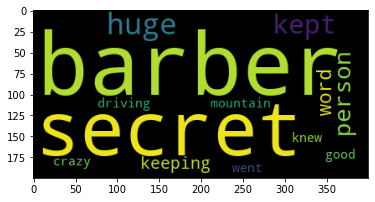

In [96]:
# 빈도수 워드클라우드 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud()
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.imshow(word_clouder)
plt.show()

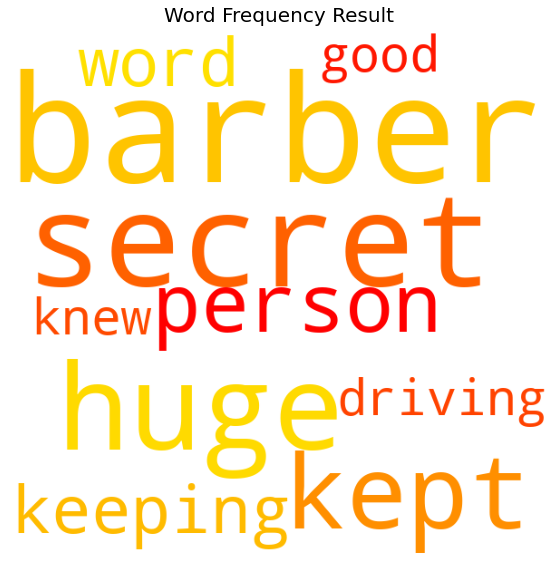

In [97]:
# 빈도수 워드클라우드 시각화
# 추가 옵션 지정 가능
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud(background_color='white',    # 배경색
                         colormap='autumn',    # 글자컬러맵
                         width=600, height=600,    # 폭과 높이로 figsize랑 맞추어야
                         random_state=123,    # 랜덤 시각화 고정
                         prefer_horizontal=True,    # 수평글자로 기록
                         max_font_size=200,    # 최대 폰트 크기
                         max_words=10)    # 표현할 최대 단어 갯수
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.figure(figsize=(10,10))    # 캔버스 사이즈
plt.imshow(word_clouder)
plt.title('Word Frequency Result', size=20)    # 제목과 사이즈
plt.axis('off')    # 그래프 축을 제거
plt.show()

In [98]:
# 빈도수 정렬
sorted(vocab.items(), key=lambda x:x[1], reverse=True)

[('barber', 8),
 ('secret', 6),
 ('huge', 5),
 ('kept', 4),
 ('person', 3),
 ('word', 2),
 ('keeping', 2),
 ('good', 1),
 ('knew', 1),
 ('driving', 1),
 ('crazy', 1),
 ('went', 1),
 ('mountain', 1)]

In [99]:
# 빈도수가 높은 단어부터 1로 인덱스화
# 빈도수가 적은(1개) 단어는 제외
word_to_index, i = dict(), 0
for (word, freq) in sorted(vocab.items(), key=lambda x:x[1], reverse=True):
    if freq > 1:
        i = i + 1
        word_to_index[word] = i
    
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [100]:
# 상위 빈도 5개 단어만 추출도 가능
good_freq = [word for word, idx in word_to_index.items() if idx >= 6]
for freq in good_freq:
    del word_to_index[freq]

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [101]:
# 원 텍스트 데이터를 정수 인코딩화
sentence_encoded = []
for sentence in sentence_pred:
    word_encoded = []
    for word in sentence:
        try:
            word_encoded.append(word_to_index[word])
        except:
            # 인덱스화 목록에 없는 단어가 존재한다면 별도 인덱스 생성
            # Out-Of-Vocabulary(OOV): 단어 집합에 존재하지 않는 단어 생기는 상황
            word_to_index['OOV'] = len(word_to_index)+1
            word_encoded.append(word_to_index['OOV'])
    sentence_encoded.append(word_encoded)
sentence_encoded

[[1, 5],
 [1, 6, 5],
 [1, 3, 5],
 [7, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 7],
 [1, 4, 7],
 [1, 4, 2],
 [7, 7, 3, 2, 7, 1, 7],
 [1, 7, 3, 7]]

## Counter by Collections 사용

```python
# 불러오기
from collections import Counter
```

In [102]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [103]:
# 문장 단어들의 차원감소 및 빈도수 계산
import numpy as np
from collections import Counter

word_list = list(np.hstack(sentence_pred))
vocab = Counter(word_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


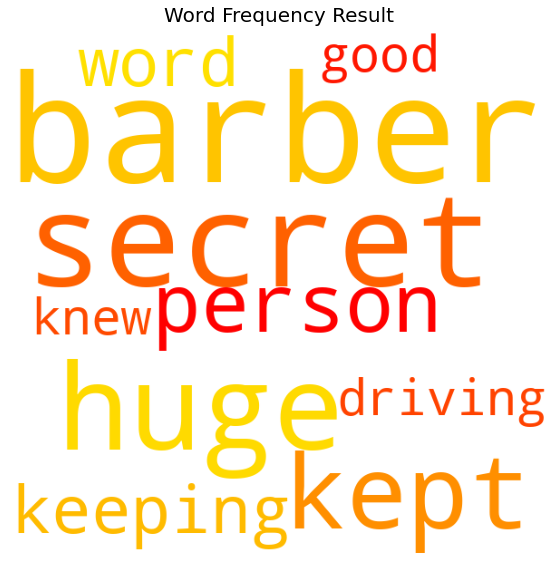

In [104]:
# 빈도수 워드클라우드 시각화
# 추가 옵션 지정 가능
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud(background_color='white',    # 배경색
                         colormap='autumn',    # 글자컬러맵
                         width=600, height=600,    # 폭과 높이로 figsize랑 맞추어야
                         random_state=123,    # 랜덤 시각화 고정
                         prefer_horizontal=True,    # 수평글자로 기록
                         max_font_size=200,    # 최대 폰트 크기
                         max_words=10)    # 표현할 최대 단어 갯수
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.figure(figsize=(10,10))    # 캔버스 사이즈
plt.imshow(word_clouder)
plt.title('Word Frequency Result', size=20)    # 제목과 사이즈
plt.axis('off')    # 그래프 축을 제거
plt.show()

In [105]:
# most_common 함수로 상위 빈도 단어만 추출도 가능
vocab = vocab.most_common(5)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [106]:
# 빈도수가 높은 단어부터 1로 인덱스화
# 빈도수가 적은(1개) 단어는 제외
word_to_index, i = dict(), 0
for (word, freq) in vocab:
    if freq > 1:
        i = i + 1
        word_to_index[word] = i
    
print(word_to_index)

# 원 텍스트 데이터를 정수 인코딩화
sentence_encoded = []
for sentence in sentence_pred:
    word_encoded = []
    for word in sentence:
        try:
            word_encoded.append(word_to_index[word])
        except:
            # 인덱스화 목록에 없는 단어가 존재한다면 별도 인덱스 생성
            # Out-Of-Vocabulary(OOV): 단어 집합에 존재하지 않는 단어 생기는 상황
            word_to_index['OOV'] = len(word_to_index)+1
            word_encoded.append(word_to_index['OOV'])
    sentence_encoded.append(word_encoded)
sentence_encoded

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


[[1, 5],
 [1, 6, 5],
 [1, 3, 5],
 [7, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 7],
 [1, 4, 7],
 [1, 4, 2],
 [7, 7, 3, 2, 7, 1, 7],
 [1, 7, 3, 7]]

## FreqDist by NLTK 사용

```python
# 불러오기
from nltk import FreqDist
```

In [107]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


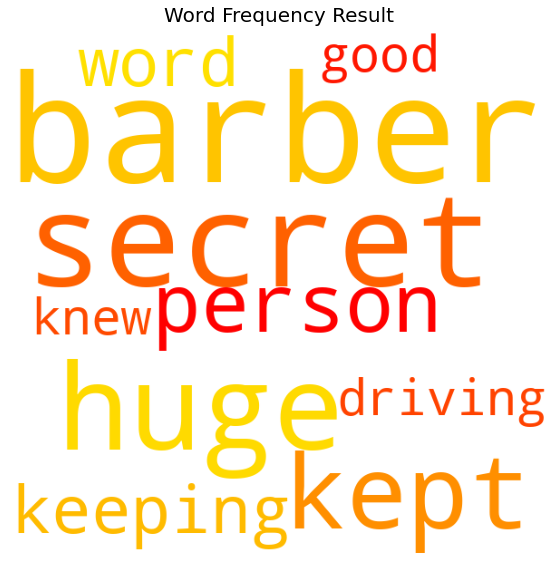

In [108]:
# 빈도수 워드클라우드 시각화
# 추가 옵션 지정 가능
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud(background_color='white',    # 배경색
                         colormap='autumn',    # 글자컬러맵
                         width=600, height=600,    # 폭과 높이로 figsize랑 맞추어야
                         random_state=123,    # 랜덤 시각화 고정
                         prefer_horizontal=True,    # 수평글자로 기록
                         max_font_size=200,    # 최대 폰트 크기
                         max_words=10)    # 표현할 최대 단어 갯수
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.figure(figsize=(10,10))    # 캔버스 사이즈
plt.imshow(word_clouder)
plt.title('Word Frequency Result', size=20)    # 제목과 사이즈
plt.axis('off')    # 그래프 축을 제거
plt.show()

In [109]:
# 문장 단어들의 차원감소 및 빈도수 계산
import numpy as np
from nltk import FreqDist

word_list = list(np.hstack(sentence_pred))
vocab = FreqDist(word_list)
print(vocab)

<FreqDist with 13 samples and 36 outcomes>


In [110]:
# most_common 함수로 상위 빈도 단어만 추출도 가능
vocab = vocab.most_common(5)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [111]:
# enumerate 함수를 사용하여 인덱스화
word_to_index = {word[0]: idx+1 for idx, word in enumerate(vocab)}
word_to_index

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}

In [112]:
# 원 텍스트 데이터를 정수 인코딩화
sentence_encoded = []
for sentence in sentence_pred:
    word_encoded = []
    for word in sentence:
        try:
            word_encoded.append(word_to_index[word])
        except:
            # 인덱스화 목록에 없는 단어가 존재한다면 별도 인덱스 생성
            # Out-Of-Vocabulary(OOV): 단어 집합에 존재하지 않는 단어 생기는 상황
            word_to_index['OOV'] = len(word_to_index)+1
            word_encoded.append(word_to_index['OOV'])
    sentence_encoded.append(word_encoded)
sentence_encoded

[[1, 5],
 [1, 6, 5],
 [1, 3, 5],
 [7, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 7],
 [1, 4, 7],
 [1, 4, 2],
 [7, 7, 3, 2, 7, 1, 7],
 [1, 7, 3, 7]]

## Tokenizer by Keras 사용

- 케라스(Keras)는 `기본적인 전처리 도구`들을 제공

```python
# 불러오기
from keras.preprocessing.text import Tokenizer
```

In [113]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


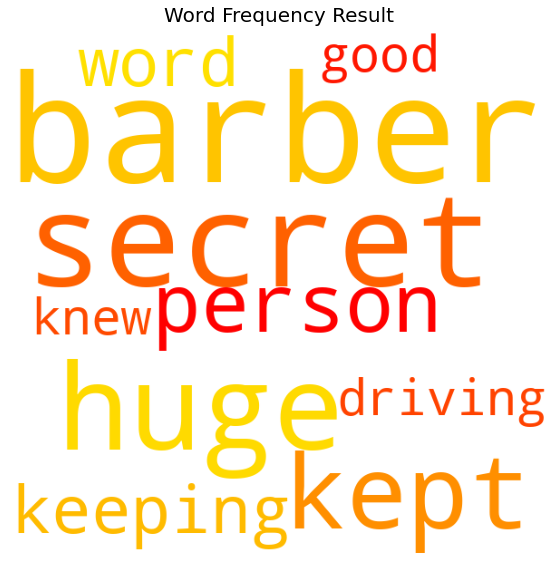

In [114]:
# 빈도수 워드클라우드 시각화
# 추가 옵션 지정 가능
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud(background_color='white',    # 배경색
                         colormap='autumn',    # 글자컬러맵
                         width=600, height=600,    # 폭과 높이로 figsize랑 맞추어야
                         random_state=123,    # 랜덤 시각화 고정
                         prefer_horizontal=True,    # 수평글자로 기록
                         max_font_size=200,    # 최대 폰트 크기
                         max_words=10)    # 표현할 최대 단어 갯수
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.figure(figsize=(10,10))    # 캔버스 사이즈
plt.imshow(word_clouder)
plt.title('Word Frequency Result', size=20)    # 제목과 사이즈
plt.axis('off')    # 그래프 축을 제거
plt.show()

In [115]:
# fit_on_texts 함수가 단어집합 빈도수 계산 및 인덱스화
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence_pred)

print(tokenizer.word_counts)
print()
print(tokenizer.word_index)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [116]:
# num_words 파라미터로 빈도수가 높은 상위단어 갯수 선택 가능
# 자연어처리의 패딩(Padding)이라는 작업 때문에,
# 케라스는 num_words가 6일 경우 0~5까지의 단어 카운트 계산
# 실질적으로 0 단어 카운트가 존재하지 않더라도 케라스는 예외계산에 활용
# 따라서 원하는 갯수 + 1의 수치를 입력
# word_vounts, word_index에는 반영되지 않고 text_to_sequences에 반영
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=6)
tokenizer.fit_on_texts(sentence_pred)

print(tokenizer.word_counts)
print()
print(tokenizer.word_index)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [117]:
# keras는 단어집합에 없는 단어인 OOV에 대해 단어를 제거하는 특성
# OOV를 보존하고 싶으면 oov_token을 사용
# 상위단어에 OOV 추가해야하니 num_words도 1증가
# OOV 단어의 인덱스는 기본적으로 1로 지정
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7, oov_token='OOV')
tokenizer.fit_on_texts(sentence_pred)

print(tokenizer.word_counts)
print()
print(tokenizer.word_index)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])

{'OOV': 1, 'barber': 2, 'secret': 3, 'huge': 4, 'kept': 5, 'person': 6, 'word': 7, 'keeping': 8, 'good': 9, 'knew': 10, 'driving': 11, 'crazy': 12, 'went': 13, 'mountain': 14}


In [118]:
# 원 텍스트 데이터를 정수 인코딩화
tokenizer.texts_to_sequences(sentence_pred)

[[2, 6],
 [2, 1, 6],
 [2, 4, 6],
 [1, 3],
 [3, 5, 4, 3],
 [4, 3],
 [2, 5, 1],
 [2, 5, 1],
 [2, 5, 3],
 [1, 1, 4, 3, 1, 2, 1],
 [2, 1, 4, 1]]

In [119]:
# 정리 (아주 심플)
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7, oov_token='OOV')
tokenizer.fit_on_texts(sentence_pred)
tokenizer.texts_to_sequences(sentence_pred)

[[2, 6],
 [2, 1, 6],
 [2, 4, 6],
 [1, 3],
 [3, 5, 4, 3],
 [4, 3],
 [2, 5, 1],
 [2, 5, 1],
 [2, 5, 3],
 [1, 1, 4, 3, 1, 2, 1],
 [2, 1, 4, 1]]

## CountVectorizer by Sklearn 사용

```python
# 불러오기
from sklearn.feature_extraction.text import CountVectorizer
```

In [120]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


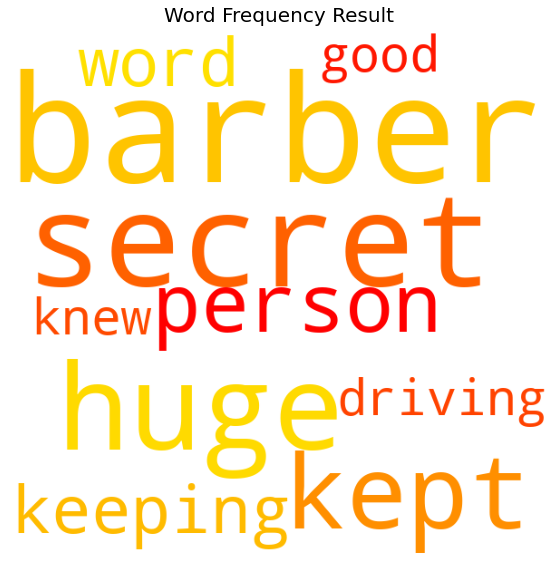

In [121]:
# 빈도수 워드클라우드 시각화
# 추가 옵션 지정 가능
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_clouder = WordCloud(background_color='white',    # 배경색
                         colormap='autumn',    # 글자컬러맵
                         width=600, height=600,    # 폭과 높이로 figsize랑 맞추어야
                         random_state=123,    # 랜덤 시각화 고정
                         prefer_horizontal=True,    # 수평글자로 기록
                         max_font_size=200,    # 최대 폰트 크기
                         max_words=10)    # 표현할 최대 단어 갯수
word_clouder = word_clouder.generate_from_frequencies(vocab)

plt.figure(figsize=(10,10))    # 캔버스 사이즈
plt.imshow(word_clouder)
plt.title('Word Frequency Result', size=20)    # 제목과 사이즈
plt.axis('off')    # 그래프 축을 제거
plt.show()

In [122]:
# 정제완료 토큰들의 재문장화
sentence_prep = [" ".join(i) for i in sentence_pred]
sentence_prep

['barber person',
 'barber good person',
 'barber huge person',
 'knew secret',
 'secret kept huge secret',
 'huge secret',
 'barber kept word',
 'barber kept word',
 'barber kept secret',
 'keeping keeping huge secret driving barber crazy',
 'barber went huge mountain']

In [123]:
# 문장별 단어 빈도로 정수 인코딩
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer()
tokenizer.fit([sentence_prep[0]])
print(tokenizer.vocabulary_)
sentence_freq = tokenizer.transform([sentence_prep[0]]).toarray().ravel()
list(sentence_freq)

{'barber': 0, 'person': 1}


[1, 1]

In [124]:
# 원 텍스트 데이터를 단어별 빈도로 정수 인코딩화
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer()
sentence_encoded = []
for each in sentence_prep:
    sentence_freq = tokenizer.fit_transform([each])
    sentence_encoded.append(list(sentence_freq.toarray().ravel()))
sentence_encoded

[[1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 2],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1]]

In [125]:
# 원 텍스트 데이터를 단어별 빈도로 정수 인코딩화
# max_features 파라미터로 상위 빈도수만 사용 가능
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer(max_features=5)
sentence_encoded = []
for each in sentence_prep:
    sentence_freq = tokenizer.fit_transform([each])
    sentence_encoded.append(list(sentence_freq.toarray().ravel()))
sentence_encoded

[[1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 2],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1, 1, 2],
 [1, 1, 1, 1]]

# **패딩(Padding)**

> **"각 `문장의 길이를 동일하게 맞추어` 행렬처리 및 병렬처리가 가능하도록하여 `연산속도를 높이고` 길이 차이로 인한 `연산오류를 방지`"**
>
> - 각 `문장의 길이는 일반적으로 다르기 때문`에 정수 인코딩의 값의 길이는 달라짐
> - 연산 과정에서 길이가 상대적으로 짧으면 `문장의 시작 또는 끝에 값이 몰려있는지 여부`를 알수 없어 오연산 가능성

## Sklearn 패딩

In [126]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [127]:
# 정제완료 토큰들의 재문장화
sentence_prep = [" ".join(i) for i in sentence_pred]
sentence_prep

['barber person',
 'barber good person',
 'barber huge person',
 'knew secret',
 'secret kept huge secret',
 'huge secret',
 'barber kept word',
 'barber kept word',
 'barber kept secret',
 'keeping keeping huge secret driving barber crazy',
 'barber went huge mountain']

In [128]:
# 원 텍스트 데이터를 단어별 빈도로 정수 인코딩화
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer()
sentence_encoded = []
for each in sentence_prep:
    sentence_freq = tokenizer.fit_transform([each]).toarray()
    sentence_encoded.append(list(sentence_freq.ravel()))
sentence_encoded

[[1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [1, 1, 2],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1]]

In [129]:
# 최대길이에 맞춰 제로 패딩
# 기계학습 알고리즘에선 의미없는 0단어는 무시할 것
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer(max_features=10)
tokenizer.fit(sentence_prep)
sentence_encoded = tokenizer.transform(sentence_prep).toarray()
sentence_encoded = sentence_encoded.tolist()
sentence_encoded

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]]

## Numpy 패딩

In [130]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [131]:
# keras 정수 인코딩
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7, oov_token='OOV')
tokenizer.fit_on_texts(sentence_pred)
tokenizer.texts_to_sequences(sentence_pred)

[[2, 6],
 [2, 1, 6],
 [2, 4, 6],
 [1, 3],
 [3, 5, 4, 3],
 [4, 3],
 [2, 5, 1],
 [2, 5, 1],
 [2, 5, 3],
 [1, 1, 4, 3, 1, 2, 1],
 [2, 1, 4, 1]]

In [132]:
# 각 문장별 최대길이 확인
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
max_len = max(len(sentence) for sentence in encoded_sentence)
max_len

7

In [133]:
# 최대길이에 맞춰 제로 패딩
# 기계학습 알고리즘에선 의미없는 0단어는 무시할 것
# 따라서 0을 채워 데이터 크기를 조정하는 것을 Zero Padding
for sentence in encoded_sentence:
    while len(sentence) < max_len:
        sentence.append(0)
        
encoded_sentence

[[2, 6, 0, 0, 0, 0, 0],
 [2, 1, 6, 0, 0, 0, 0],
 [2, 4, 6, 0, 0, 0, 0],
 [1, 3, 0, 0, 0, 0, 0],
 [3, 5, 4, 3, 0, 0, 0],
 [4, 3, 0, 0, 0, 0, 0],
 [2, 5, 1, 0, 0, 0, 0],
 [2, 5, 1, 0, 0, 0, 0],
 [2, 5, 3, 0, 0, 0, 0],
 [1, 1, 4, 3, 1, 2, 1],
 [2, 1, 4, 1, 0, 0, 0]]

## Keras 패딩

```python
# 불러오기
from keras.preprocessing.sequence import pad_sequences
```

In [134]:
# keras 정수 인코딩
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7, oov_token='OOV')
tokenizer.fit_on_texts(sentence_pred)
tokenizer.texts_to_sequences(sentence_pred)

[[2, 6],
 [2, 1, 6],
 [2, 4, 6],
 [1, 3],
 [3, 5, 4, 3],
 [4, 3],
 [2, 5, 1],
 [2, 5, 1],
 [2, 5, 3],
 [1, 1, 4, 3, 1, 2, 1],
 [2, 1, 4, 1]]

In [135]:
# keras 제로 패딩
from keras_preprocessing.sequence import pad_sequences

encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence)
encoded_sentence

array([[0, 0, 0, 0, 0, 2, 6],
       [0, 0, 0, 0, 2, 1, 6],
       [0, 0, 0, 0, 2, 4, 6],
       [0, 0, 0, 0, 0, 1, 3],
       [0, 0, 0, 3, 5, 4, 3],
       [0, 0, 0, 0, 0, 4, 3],
       [0, 0, 0, 0, 2, 5, 1],
       [0, 0, 0, 0, 2, 5, 1],
       [0, 0, 0, 0, 2, 5, 3],
       [1, 1, 4, 3, 1, 2, 1],
       [0, 0, 0, 2, 1, 4, 1]])

- **Keras 옵션:**

> **(1) padding 파라미터:** 제로패딩시 `0을 채울 위치` 결정(`pre or post`)
>
> **(2) maxlen 파라미터:** 제로패딩시 `최대 문장의 길이` 결정

In [136]:
# keras 제로 패딩
# pad_sequences는 기본적으로 문서의 앞에 0을 채움
# 시계열을 가정하여 데이터가 최근값일거라 가정하기 때문
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence, padding='post')
encoded_sentence

array([[2, 6, 0, 0, 0, 0, 0],
       [2, 1, 6, 0, 0, 0, 0],
       [2, 4, 6, 0, 0, 0, 0],
       [1, 3, 0, 0, 0, 0, 0],
       [3, 5, 4, 3, 0, 0, 0],
       [4, 3, 0, 0, 0, 0, 0],
       [2, 5, 1, 0, 0, 0, 0],
       [2, 5, 1, 0, 0, 0, 0],
       [2, 5, 3, 0, 0, 0, 0],
       [1, 1, 4, 3, 1, 2, 1],
       [2, 1, 4, 1, 0, 0, 0]])

In [137]:
# 가장 긴 길이의 문서를 기준으로 패딩하지만, 이상치 문장일 수 있음
# 뒷단어인 0이 삭제되기도 하지만 Full 문장은 앞단어가 삭제
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence, padding='post',
                                 maxlen=5)
encoded_sentence

array([[2, 6, 0, 0, 0],
       [2, 1, 6, 0, 0],
       [2, 4, 6, 0, 0],
       [1, 3, 0, 0, 0],
       [3, 5, 4, 3, 0],
       [4, 3, 0, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 3, 0, 0],
       [4, 3, 1, 2, 1],
       [2, 1, 4, 1, 0]])

In [138]:
# 가장 긴 길이의 문서를 기준으로 패딩하지만, 이상치 문장일 수 있음
# 뒷단어인 0이 삭제되기도 하지만 Full 문장은 앞단어가 삭제
# truncating 파라미터로 Full 문장의 삭제위치 결정
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence, padding='post',
                                 maxlen=5, truncating='post')
encoded_sentence

array([[2, 6, 0, 0, 0],
       [2, 1, 6, 0, 0],
       [2, 4, 6, 0, 0],
       [1, 3, 0, 0, 0],
       [3, 5, 4, 3, 0],
       [4, 3, 0, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 3, 0, 0],
       [1, 1, 4, 3, 1],
       [2, 1, 4, 1, 0]])

In [139]:
# 특정 숫자로 패딩
# 제로 패딩이 관례이긴 하지만 반드시 지켜야 하는 규칙 아님
# value 파라미터로 지정 가능
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence, padding='post',
                                 maxlen=5, truncating='post',
                                 value=-1)
encoded_sentence

array([[ 2,  6, -1, -1, -1],
       [ 2,  1,  6, -1, -1],
       [ 2,  4,  6, -1, -1],
       [ 1,  3, -1, -1, -1],
       [ 3,  5,  4,  3, -1],
       [ 4,  3, -1, -1, -1],
       [ 2,  5,  1, -1, -1],
       [ 2,  5,  1, -1, -1],
       [ 2,  5,  3, -1, -1],
       [ 1,  1,  4,  3,  1],
       [ 2,  1,  4,  1, -1]])

# **원-핫 인코딩(One-Hot Encoding)**

> **"컴퓨터 또는 기계는 문자보다 `숫자를 더 잘 처리`하기 때문에, 자연어처리에서 정수인코딩 후 `각 정수를 고유한 벡터로 변환`하는 많은 기법 중에서 `단어를 표현하는 가장 기본적인 표현 방법`"**
>
> - `머신러닝과 딥러닝`을 적용하기 위해 반드시 익혀야
> - 서로 다른 중복되지 않은 단어들의 집합인 `단어집합`을 공간차원으로 확장하여 `각 문장을 여러개의 벡터변수`로 변환
> - 각 문장 내 `표현하고 싶은 단어의 인덱스에 1의 값`을 `다른 인덱스에는 0`을 부여하는 벡터 표현방식으로 `원-핫 벡터`라고 함

---

**0) 자연어를 왜 벡터로 바꾸어야 합니까?**

- 프로그래밍 언어로 코드를 작성해도, `컴퓨터는 언어를 이해하지 못하고` 단지 우리가 숫자기반의 형태(벡터)로 바꾸어주면 `단순히 유사성이나 관련성을 연산`만 해주는 것 뿐

- 자연어처리의 성능은 `알고리즘 성능 <<< 임베딩 성능`이라고 할만큼 벡터로 변환된 수치들이 `단어들의 특징이나 유사성 등`을 반영하지 못하면 고성능 알고리즘도 무용지물

```python
# 불러오기
from keras.utils import to_categorical
```

In [140]:
# 예시 텍스트 데이터
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = "A barber is a person. a barber is good person. \
            a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. \
            Huge secret. His barber kept his word. a barber kept his word. \
            His barber kept his secret. \
            But keeping and keeping such a huge secret to himself was driving the barber crazy. \
            the barber went up a huge mountain."


# 단어 토큰화 및 빈도수 추정
stop_words = set(stopwords.words('english'))

sentence_pred = []
vocab = dict()
for sentence in sent_tokenize(sentences):
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    for word in tokenized_sentence: 
        # 모든 단어의 소문자화
        word = word.lower()
        # 불용어 제거
        if word not in stop_words:
            # 단어 길이가 2이하는 제거
            if len(word) > 2:
                result.append(word)
                # 결과 단어 정리 및 빈도수 계신
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] = vocab[word] + 1
    sentence_pred.append(result)

print(sentence_pred, '\n\n', vocab)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

 {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [141]:
# 토큰화 및 정수 인코딩
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7, oov_token='OOV')
tokenizer.fit_on_texts(sentence_pred)
encoded_sentence = tokenizer.texts_to_sequences(sentence_pred)
encoded_sentence = pad_sequences(encoded_sentence, padding='post',
                                 maxlen=5, truncating='post',
                                 value=0)
encoded_sentence

array([[2, 6, 0, 0, 0],
       [2, 1, 6, 0, 0],
       [2, 4, 6, 0, 0],
       [1, 3, 0, 0, 0],
       [3, 5, 4, 3, 0],
       [4, 3, 0, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 1, 0, 0],
       [2, 5, 3, 0, 0],
       [1, 1, 4, 3, 1],
       [2, 1, 4, 1, 0]])

In [142]:
# 각 문장별 원-핫 인코딩으로 전체 글의 변수화
from keras.utils import to_categorical

for idx, each in enumerate(encoded_sentence):
    print(sentence_pred[idx])
    print(each)
    print(to_categorical(each))
    print()

['barber', 'person']
[2 6 0 0 0]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

['barber', 'good', 'person']
[2 1 6 0 0]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

['barber', 'huge', 'person']
[2 4 6 0 0]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

['knew', 'secret']
[1 3 0 0 0]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

['secret', 'kept', 'huge', 'secret']
[3 5 4 3 0]
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]

['huge', 'secret']
[4 3 0 0 0]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

['barber', 'kept', 'word']
[2 5 1 0 0]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0

- **한계:** 

**(1)** 단어집합의 크기가 `증가`하면 저장공간이 `증가`되어 공간적 낭비 유발

**(2)** 벡터들끼리의 `유사도를 표현하지 못해` 관련성 반영 어려워, `연관 검색어 추출 어려움`
